### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,confusion_matrix
from tabulate import tabulate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score,accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

# Task 1: Data Preparation and Analysis

# Task 1.1

### Reading the dataset

In [2]:
dataset = pd.read_csv(r"A2data.csv",delimiter=';')

### Data Preprocessing

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4781 non-null   float64
 1   volatile acidity      4780 non-null   float64
 2   citric acid           4776 non-null   float64
 3   residual sugar        4776 non-null   object 
 4   chlorides             4780 non-null   float64
 5   free sulfur dioxide   4778 non-null   object 
 6   total sulfur dioxide  4778 non-null   object 
 7   density               4774 non-null   object 
 8   pH                    4780 non-null   float64
 9   sulphates             4779 non-null   float64
 10  alcohol               4781 non-null   float64
 11  quality               4781 non-null   int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 448.3+ KB


In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,pH,sulphates,alcohol,quality
count,4781.000000,4780.000000,4776.000000,4780.000000,4780.000000,4779.000000,4781.000000,4781.000000
mean,6.862571,0.277855,0.334585,0.045797,3.188720,0.489454,10.506018,5.877641
std,0.844342,0.100776,0.120978,0.021849,0.150827,0.113927,1.229652,0.889434
min,3.800000,0.080000,0.000000,0.009000,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,0.036000,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,0.043000,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,0.050000,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,0.346000,3.820000,1.080000,14.200000,9.000000


In [5]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6


In [7]:
dataset.shape

(4781, 12)

In [8]:
dataset["free sulfur dioxide"].unique()

array(['45', '14', '30', '47', '29', '17', '34', '19', '41', '25', '16',
       '56', '35', '32', '37', '20', '7', '31', '43', '22', '21', '38',
       '63', '28', '33', '62', '39', '50', '44', '27', '81', '48', '50.5',
       '9', '26', '51', '42', '54', '52', '55', '69', '65', '15', '4',
       '64', '60', '68', '8', '57', '40', '46', '59', '36', '49', '18',
       '24', '53', '23', '58', '12', '72', '5', '61', '66', '75', '76',
       '64.5', '3', '82', '10', ' ', '11', '131', '38.5', nan, '82.5',
       '13', '87', '73.5', '83', '67', '79', '70', '6', '77', '122.5',
       '78', '11.5', '80', '44.5', '35.5', '73', '71', '15.5', '77.5',
       '41.5', '118.5', '96', '52.5', '146.5', '48.5', '128', '110',
       '42.5', '40.5', '39.5', '19.5', '85', '74', '89', '86', '93',
       '30.5', '138.5', '95', '124', '105', '101', '108', '2', '79.5',
       '61.5', '98', '112', '51.5', '70.5', '23.5', '59.5', '28.5',
       '60.5', '43.5', '289', '97'], dtype=object)

In [9]:
dataset["total sulfur dioxide"].unique()

array(['170', '132', '97', '186', '99', '75', '171', '133', '102', '122',
       '168', '142', '245', '146', '141', '114', '47', '100', '117',
       '179', '123', '149', '138', '158', '157', '160', '152', '154',
       '167', '206', '207', '150', '173', '124', '82', '108', '191',
       '213', '147', '78', '111', '151', '120', '174', '96', '105', '244',
       '238.5', '201', '72', '87', '69', '103', '166', '164', '155',
       '156', '202', '243', '136', '148', '240', '80', '83', '192', '162',
       '109', '187', '163', '255', '195', '143', '85', '196', '131',
       '126', '203', '184', '57', '241', '188', '121', '79', '77', '107',
       '116', '135', '76', '198', '119', '159', '205', '177', '197', '98',
       ' ', '176', '183', '227', '226', '230', '210', '211', '125', '181',
       '180', '214', '204', '236', '134', '153', '68', '161', '172',
       '144', '140', '145', '200', '272', '194', '208', '221', '90',
       '218.5', '249.5', '139', '199', '118', '95', '231', '234', '1

In [10]:
# Remove rows with ' ' in the 'free sulfur dioxide' column
dataset = dataset[dataset['free sulfur dioxide'] != ' ']

# Remove rows with ' ' in the 'total sulfur dioxide' column
dataset = dataset[dataset['total sulfur dioxide'] != ' ']

### Missing value treatment

In [11]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        1
citric acid             5
residual sugar          5
chlorides               1
free sulfur dioxide     3
total sulfur dioxide    3
density                 7
pH                      1
sulphates               2
alcohol                 0
quality                 0
dtype: int64

In [12]:
dataset.dropna(inplace=True)

# Check if there are at least 600 rows in the cleaned data
if len(dataset) < 600:
    print("Not enough data without missing values.")
else:
    # Take a random sample of 600 instances
    random_sample = dataset.sample(n=600, random_state=0)  # You can change the random_state if needed

    # Write the random sample to a new CSV file
    random_sample.to_csv(r'A2RandomSample.csv', index=False)

    print("Random sample saved to A2RandomSample.csv")

Random sample saved to A2RandomSample.csv


In [13]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
dataset.shape

(4751, 12)

#### 30 values have been dropped due to null values.

#### Considering the dataset with only 600 instances with no missing values.

In [15]:
df=pd.read_csv(r'A2RandomSample.csv')

In [16]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [17]:
df.shape

(600, 12)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         600 non-null    float64
 1   volatile acidity      600 non-null    float64
 2   citric acid           600 non-null    float64
 3   residual sugar        600 non-null    float64
 4   chlorides             600 non-null    float64
 5   free sulfur dioxide   600 non-null    float64
 6   total sulfur dioxide  600 non-null    float64
 7   density               600 non-null    float64
 8   pH                    600 non-null    float64
 9   sulphates             600 non-null    float64
 10  alcohol               600 non-null    float64
 11  quality               600 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 56.4 KB


# Task 1.2

## Data Visualizations Alcohol vs Density

### Scatter Plot

Text(0, 0.5, 'Alcohol')

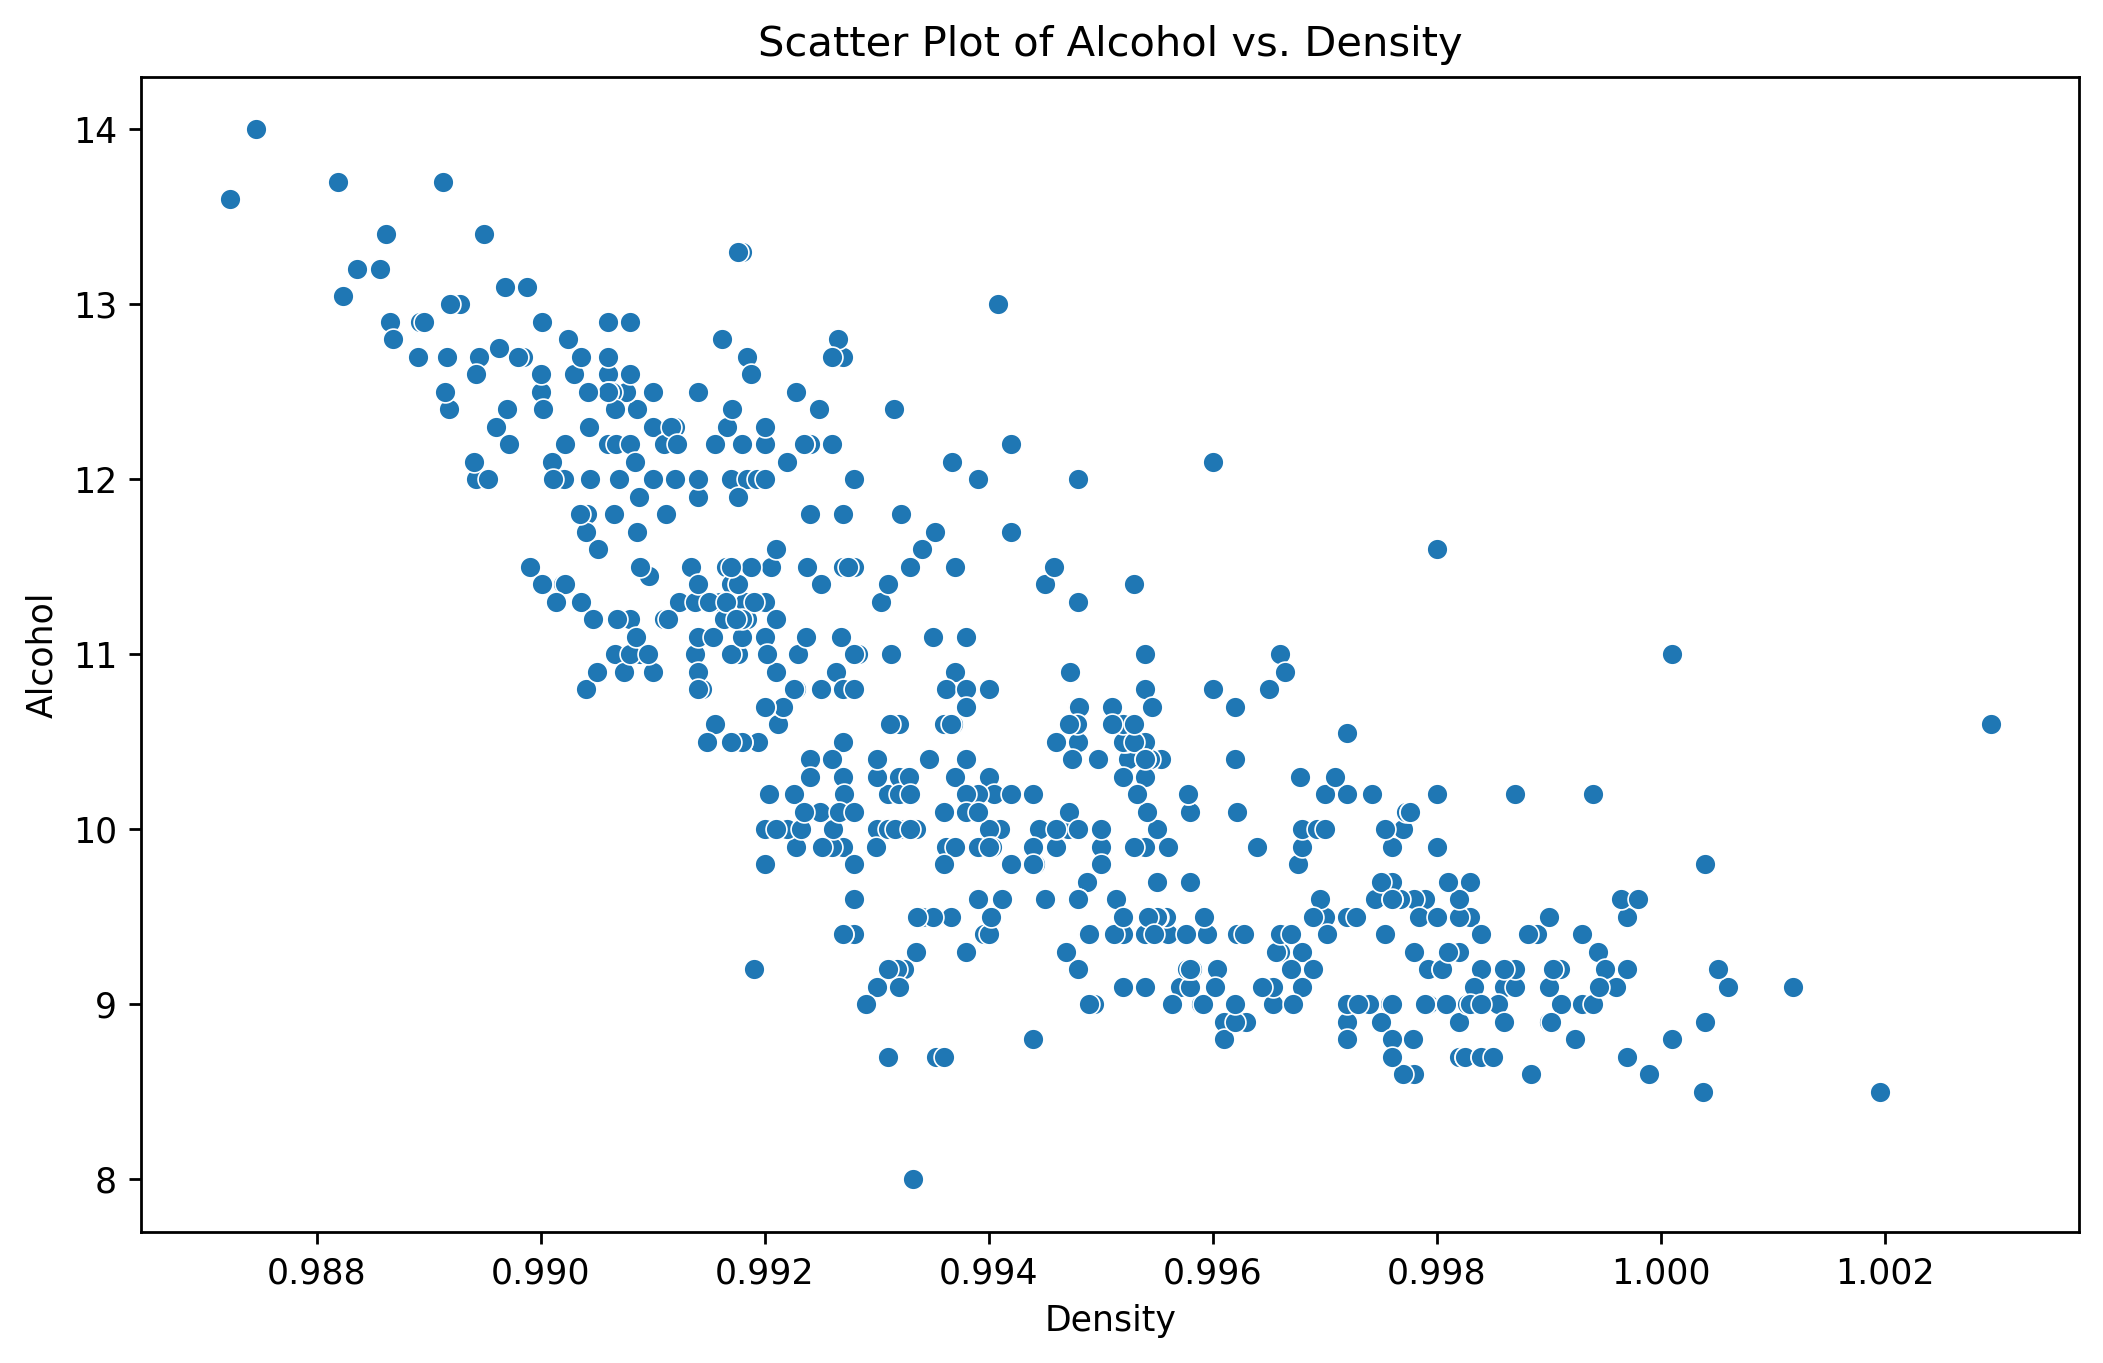

In [19]:
plt.figure(figsize=(10, 6),dpi=250)
sns.scatterplot(x='density', y='alcohol', data=df)
plt.title('Scatter Plot of Alcohol vs. Density')
plt.xlabel('Density')
plt.ylabel('Alcohol')

### Line Plot

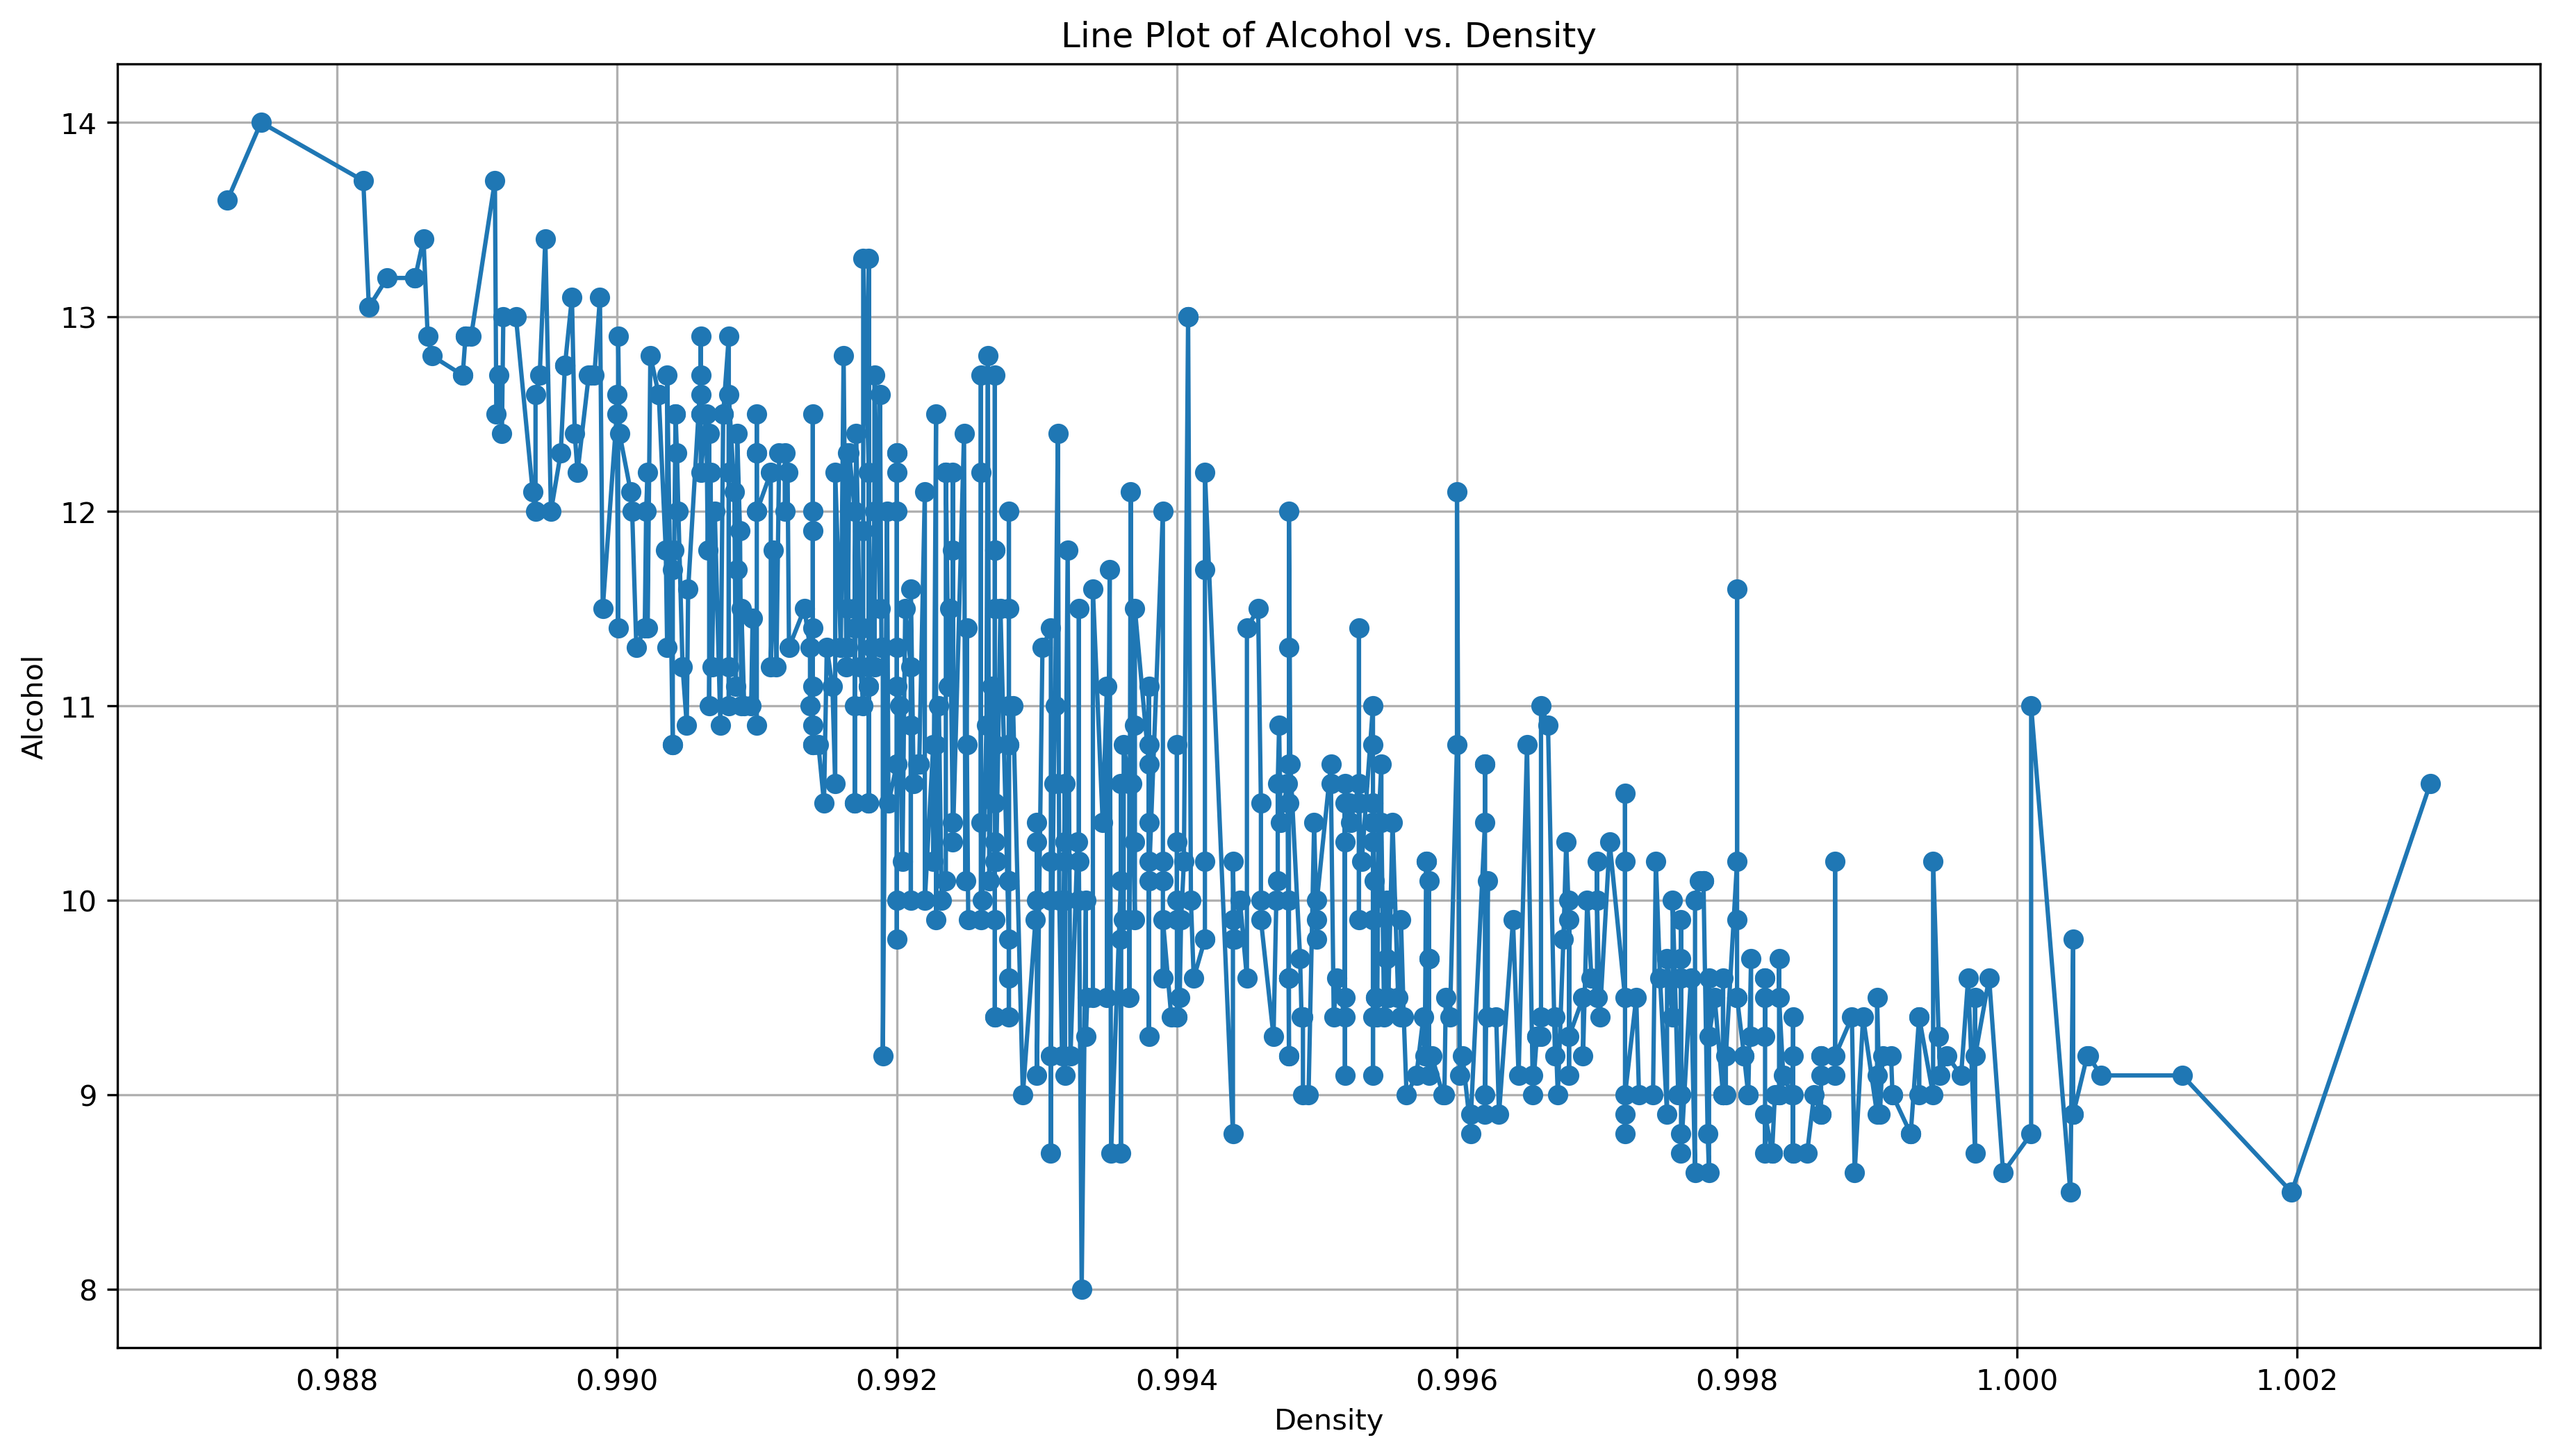

In [20]:
df_sorted = df.sort_values(by='density')
plt.figure(figsize=(15, 8),dpi=300)
plt.plot(df_sorted['density'], df_sorted['alcohol'], marker='o', linestyle='-')
plt.title('Line Plot of Alcohol vs. Density')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.grid(True)

### Correlation Heatmap

<Axes: >

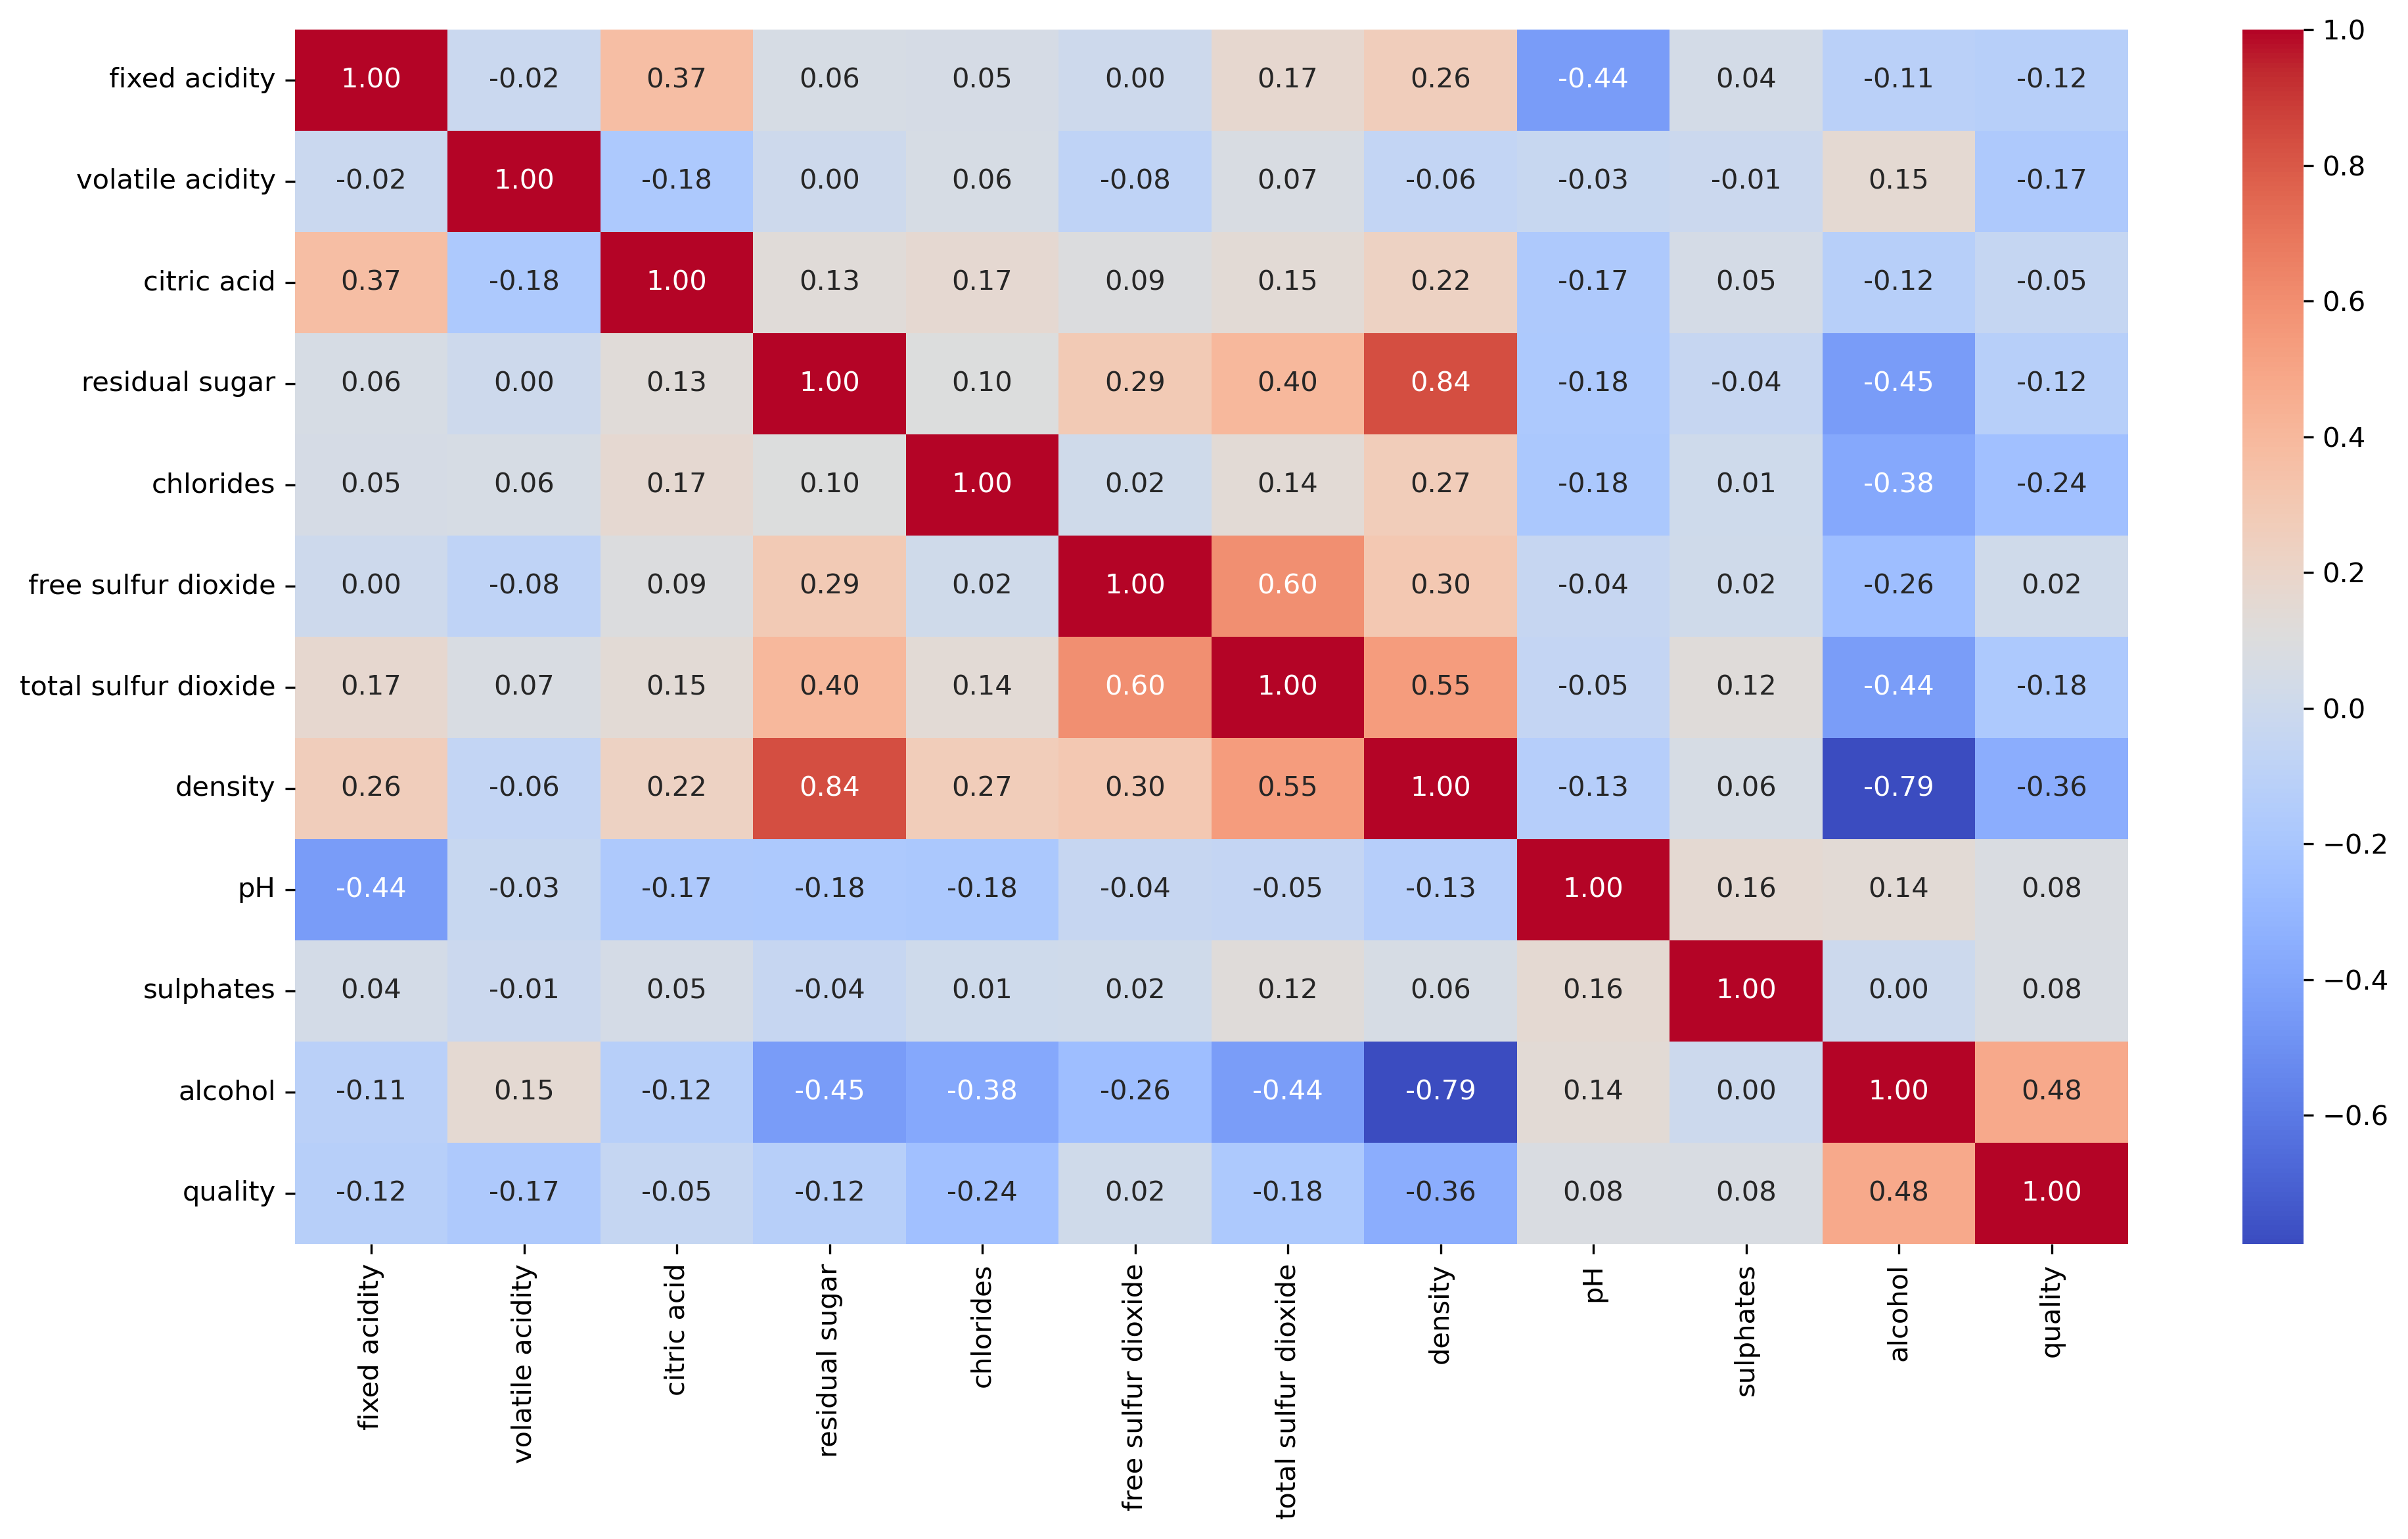

In [21]:
plt.figure(figsize=(15, 8),dpi=300)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

### Density and Alcohol content exhibit a strong negative correlation of -0.79, meaning that as Density increases, Alcohol content decreases. This relationship is consistent across scatter plots, line graphs, and is confirmed by Pearson correlation analysis. This negative correlation suggests that when the density of a substance increases, there is a corresponding decrease in alcohol content.

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=df["density"].values.reshape(-1, 1) 
y=df["alcohol"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model_fit=model.fit(x_train, y_train)
y_pred=model_fit.predict(x_test)

In [24]:
y_pred = y_pred.round().astype(int)

In [25]:
df.shape

(600, 12)

In [26]:
y_pred

array([12, 10, 10, 11, 10, 10, 11, 11,  9, 10, 11, 12,  9, 11, 10, 11,  9,
       11, 10, 11,  9, 12,  9, 10, 10,  9, 11,  9, 11, 10, 11, 11, 10, 12,
       12, 11, 12, 10, 11, 10,  9,  9, 10, 11, 11, 10, 10, 11, 11, 11, 11,
       11, 10, 10, 11, 11, 10, 11, 10, 12,  9, 10, 11, 12, 11, 11,  9, 10,
       10, 11, 11, 11,  9, 11, 12,  9,  9, 10, 11, 11, 10, 10, 11, 10, 12,
       11, 11, 10, 11, 12,  9,  9, 11, 10, 10, 11, 11,  9,  9, 11, 11, 11,
       11, 12, 11, 10,  9, 11, 11, 10, 11, 11, 12, 10, 12, 12, 11, 12, 12,
       12])

In [27]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
# Print the R2 score
print(f"R-squared (R2) Score: {r2:.2f}")

R-squared (R2) Score: 0.47


In [28]:
slope = model.coef_[0]  # Coefficient (slope)
intercept = model.intercept_  # Intercept
print(f"Slope (Coefficient): {slope:.2f}")
print(f"Intercept: {intercept:.2f}")

Slope (Coefficient): -331.45
Intercept: 340.01


# Task 1.3

## Relationship between two variables: quality and alcohol

### Box Plot

([<matplotlib.axis.YTick at 0x235f50b9010>,
 [Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9'),
  Text(0, 10, '10'),
  Text(0, 11, '11'),
  Text(0, 12, '12'),
  Text(0, 13, '13'),
  Text(0, 14, '14')])

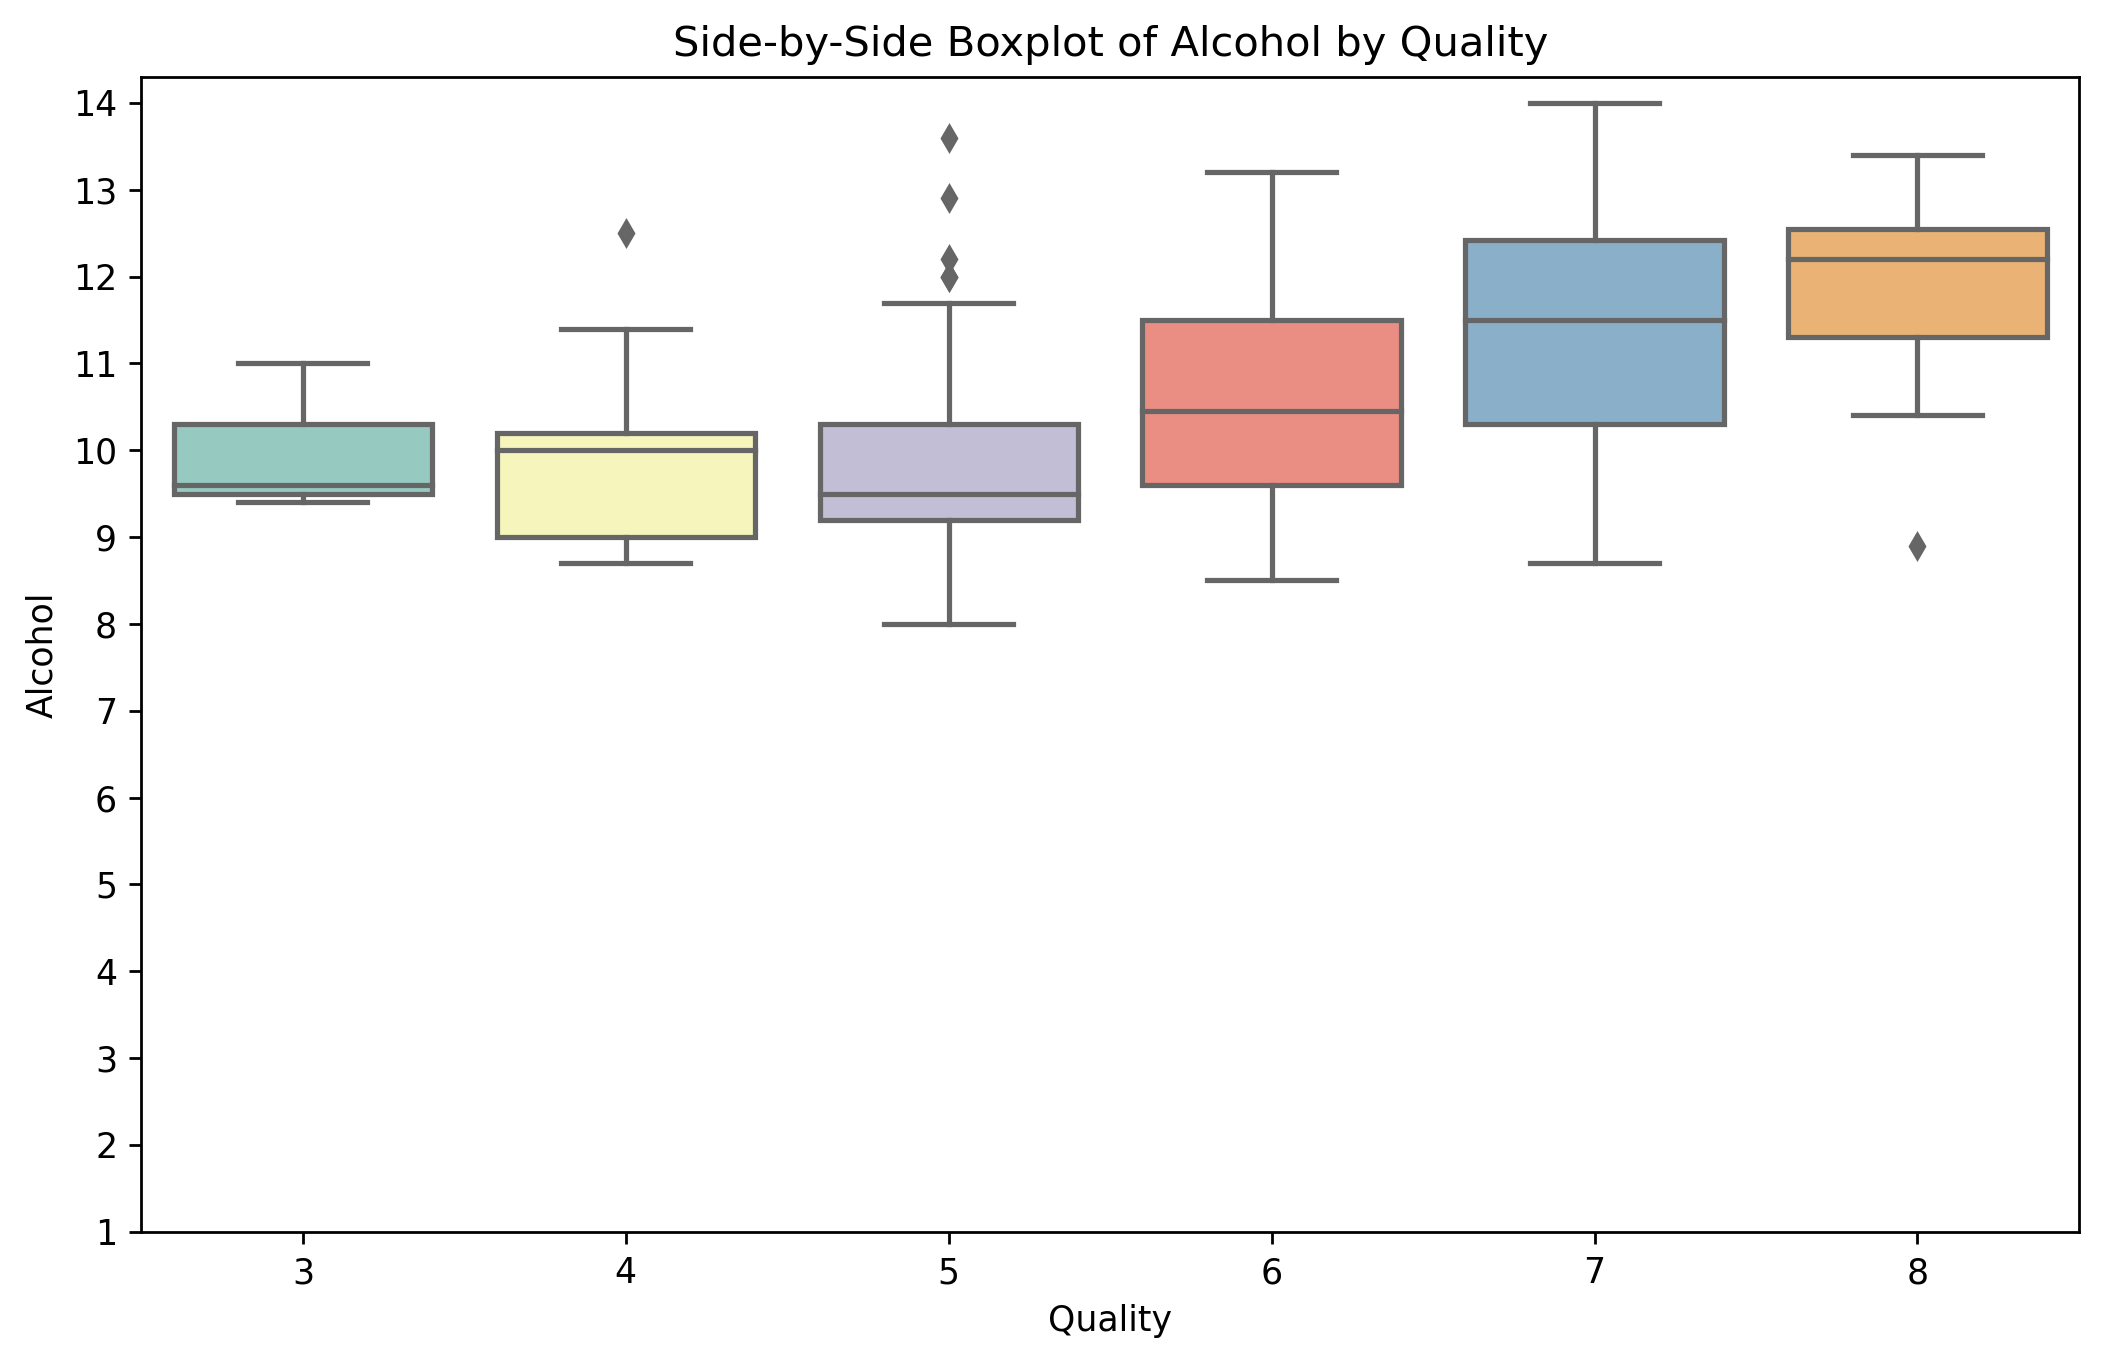

In [29]:
plt.figure(figsize=(10, 6),dpi=250)
sns.boxplot(x='quality', y='alcohol', data=df, palette='Set3')
plt.title('Side-by-Side Boxplot of Alcohol by Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.yticks([i for i in range(1,15,1)])


#### In the dataset, as wine quality increases, there is a noticeable trend where the median value of alcohol content also increases. When wine quality is low, the median is close to the first quartile, suggesting a concentration of lower-quality wines with relatively lower alcohol content. However, as quality improves, the median shifts towards the center of the alcohol content distribution, indicating a more balanced distribution of alcohol levels in higher-quality wines. Notably, wine quality ratings of 4, 5, and 8 exhibit some outliers, suggesting the presence of exceptional or unusual wines within these categories. 

In [30]:
dataset["quality"].value_counts()

quality
6    2119
5    1419
7     852
8     175
4     161
3      20
9       5
Name: count, dtype: int64

In [31]:
dataset["quality"].unique()

array([6, 8, 5, 7, 4, 3, 9], dtype=int64)

# Task 2: Classification

### Task 2.1

## Decision Tree

In [32]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         600 non-null    float64
 1   volatile acidity      600 non-null    float64
 2   citric acid           600 non-null    float64
 3   residual sugar        600 non-null    float64
 4   chlorides             600 non-null    float64
 5   free sulfur dioxide   600 non-null    float64
 6   total sulfur dioxide  600 non-null    float64
 7   density               600 non-null    float64
 8   pH                    600 non-null    float64
 9   sulphates             600 non-null    float64
 10  alcohol               600 non-null    float64
 11  quality               600 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 56.4 KB


In [34]:
# Define feature and target variables
X = df.drop('quality', axis=1)  # Features
y = df['quality']  # Target variable
results_df_classification = pd.DataFrame(columns=['Split', 'Depth', 'Min Samples', 'Min Weight', 'Max Feat', 'Max Nodes', 'Accuracy', 'Precision', 'Recall'])
train_test_splits = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
param_dist_classification = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 3, 5, 7, 9, 11, 12, 15, 17],
    "min_samples_leaf": [i for i in range(1, 11, 1)],
    "min_weight_fraction_leaf": np.linspace(0.1, 0.9, 9),
    "max_features": ["auto", "log2", "sqrt", None],
    "max_leaf_nodes": [None, 10, 20, 30, 40, 50, 60, 70, 80, 90],
}

temp = []
# Iterate through train/test splits and perform Decision Tree Classification
for split in train_test_splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)
    # Task 2.2: Decision Tree Classification
    classifier = DecisionTreeClassifier()
    random_search_classification = RandomizedSearchCV(
        classifier, param_distributions=param_dist_classification, n_iter=10, scoring='accuracy', cv=5, random_state=42)
    random_search_classification.fit(X_train, y_train)
    best_classifier = random_search_classification.best_estimator_
    y_pred_classification = best_classifier.predict(X_test)
    accuracy = round(accuracy_score(y_test, y_pred_classification), 3)
    precision = precision_score(y_test, y_pred_classification, average='macro')
    recall = recall_score(y_test, y_pred_classification, average='macro')
    best_params_classification = random_search_classification.best_params_
    perf = {
        'Split': split,
        'Depth': best_params_classification['max_depth'],
        'Min Samples': best_params_classification['min_samples_leaf'],
        'Min Weight': round(best_params_classification['min_weight_fraction_leaf'], 2),
        'Max Feat': best_params_classification['max_features'],
        'Max Nodes': best_params_classification['max_leaf_nodes'],
        'Accuracy': round(accuracy,3),
        'Precision': round(precision,3),
        'Recall': round(recall,3)
    }
    perf_df = pd.DataFrame.from_records([perf])
    temp.append(perf_df)


# Sort the results DataFrames by 'Accuracy' for classification
results_df_classification = pd.concat(temp)
results_df_classification.sort_values(by='Accuracy', ascending=False, inplace=True)

# Select the best combination (the one with the highest Accuracy)
best_combination_classification = results_df_classification.iloc[0]

# Print the results using tabulate for better display
print("Results for Different Split Combinations and Parameters (Classification):")
table_classification = tabulate(results_df_classification, headers='keys', tablefmt='pretty', showindex=False)
print(table_classification)

print("\nBest Combination (Max Accuracy - Classification):")
table_best_classification = tabulate(best_combination_classification.to_frame().T, headers='keys', tablefmt='pretty', showindex=False)
print(table_best_classification)


Results for Different Split Combinations and Parameters (Classification):
+-------+-------+-------------+------------+----------+-----------+----------+-----------+--------+
| Split | Depth | Min Samples | Min Weight | Max Feat | Max Nodes | Accuracy | Precision | Recall |
+-------+-------+-------------+------------+----------+-----------+----------+-----------+--------+
|  0.3  |   3   |      7      |    0.2     |   sqrt   |    90     |  0.456   |   0.153   | 0.204  |
|  0.7  |  12   |     10      |    0.2     |   sqrt   |    60     |  0.452   |   0.153   | 0.217  |
|  0.4  |  12   |     10      |    0.2     |   sqrt   |    60     |  0.438   |   0.144   | 0.192  |
|  0.2  |  12   |     10      |    0.2     |   sqrt   |    60     |  0.425   |   0.165   | 0.195  |
|  0.8  |   9   |      6      |    0.1     |   log2   |    50     |  0.421   |   0.198   | 0.209  |
|  0.6  |   3   |      7      |    0.2     |   sqrt   |    90     |  0.414   |   0.139   | 0.202  |
|  0.5  |  17   |      3  

## KNN Classifier

### Standardising the entire dataset

In [35]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Extract the columns to be standardized (excluding 'quality')
data_to_be_standardized = df.drop(["quality"], axis=1)
# Standardize the selected numeric columns
data_standardized = scaler.fit_transform(data_to_be_standardized)
std_data=pd.DataFrame(data_standardized,columns=data_to_be_standardized.columns)
std_data["quality"]=df["quality"]

In [36]:
X = std_data.drop('quality', axis=1)  # Features
y = std_data['quality']  # Target variable
results_df_classification = pd.DataFrame(columns=['Train/Test Split', 'n_neighbors', 'weights', 'algorithm', 'p', 'Accuracy', 'Precision', 'Recall'])
train_test_splits = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
param_dist_classification = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

temp = []

# Iterate through train/test splits and perform KNN Classification
for split in train_test_splits:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)

    best_accuracy = -1  # Initialize with a very low value
    best_combination = None

    # Iterate through parameter combinations
    for n_neighbors in param_dist_classification['n_neighbors']:
        for weight in param_dist_classification['weights']:
            for algorithm in param_dist_classification['algorithm']:
                for p in param_dist_classification['p']:
                    # Create a KNN Classifier
                    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weight, algorithm=algorithm, p=p)

                    # Fit the model
                    classifier.fit(X_train, y_train)

                    # Make predictions on the test data
                    y_pred = classifier.predict(X_test.values)

                    # Calculate accuracy, precision, and recall
                    accuracy = accuracy_score(y_test, y_pred)
                    precision = precision_score(y_test, y_pred, average='weighted')
                    recall = recall_score(y_test, y_pred, average='weighted')

                    # Check if this combination has a better accuracy than the current best
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_combination = {
                            'Train/Test Split': split,
                            'n_neighbors': n_neighbors,
                            'weights': weight,
                            'algorithm': algorithm,
                            'p': p,
                            'Accuracy': round(accuracy, 3),
                            'Precision': round(precision, 3),
                            'Recall': round(recall, 3)
                        }

    # Append the best combination for this split to the results DataFrame
    perf_df = pd.DataFrame.from_records([best_combination])
    temp.append(perf_df)


# Sort the results DataFrames by 'Accuracy' for classification
results_df_classification = pd.concat(temp)
    #results_df_classification = results_df_classification.append(best_combination, ignore_index=True)

# Sort the results DataFrame by 'Accuracy' in descending order
results_df_classification.sort_values(by='Accuracy', ascending=False, inplace=True)

# Select the best combination (the one with the highest Accuracy)
best_overall_combination = results_df_classification.iloc[0]
print("Results for Best Combination in Each Split:")
table_classification = tabulate(results_df_classification, headers='keys', tablefmt='pretty', showindex=False)
print(table_classification)
print("\nOverall Best Combination (Max Accuracy):")
table_best_overall = tabulate(best_overall_combination.to_frame().T, headers='keys', tablefmt='pretty', showindex=False)
print(table_best_overall)


Results for Best Combination in Each Split:
+------------------+-------------+----------+-----------+---+----------+-----------+--------+
| Train/Test Split | n_neighbors | weights  | algorithm | p | Accuracy | Precision | Recall |
+------------------+-------------+----------+-----------+---+----------+-----------+--------+
|       0.2        |      7      | distance |   auto    | 1 |  0.617   |   0.628   | 0.617  |
|       0.3        |     11      | distance |   auto    | 1 |  0.611   |   0.624   | 0.611  |
|       0.4        |     13      | distance |   auto    | 1 |  0.583   |   0.594   | 0.583  |
|       0.5        |      7      | distance |   auto    | 2 |   0.54   |   0.536   |  0.54  |
|       0.8        |      5      | distance |   auto    | 1 |  0.519   |   0.521   | 0.519  |
|       0.6        |      5      | distance |   auto    | 1 |  0.506   |   0.514   | 0.506  |
|       0.7        |      9      | distance |   auto    | 1 |  0.505   |   0.527   | 0.505  |
+---------------

In [37]:
k_values = results_df_classification['n_neighbors']
accuracies = results_df_classification['Accuracy']

knn_chart = pd.concat([k_values, accuracies], axis=1).sort_values(by = ['n_neighbors']).reset_index(drop=True)

knn_chart_df = knn_chart.groupby('n_neighbors')
knn_chart_df = knn_chart_df.agg({'Accuracy' : 'max'}).reset_index()
knn_chart_df

,n_neighbors,Accuracy
0,5,0.519
1,7,0.617
2,9,0.505
3,11,0.611
4,13,0.583


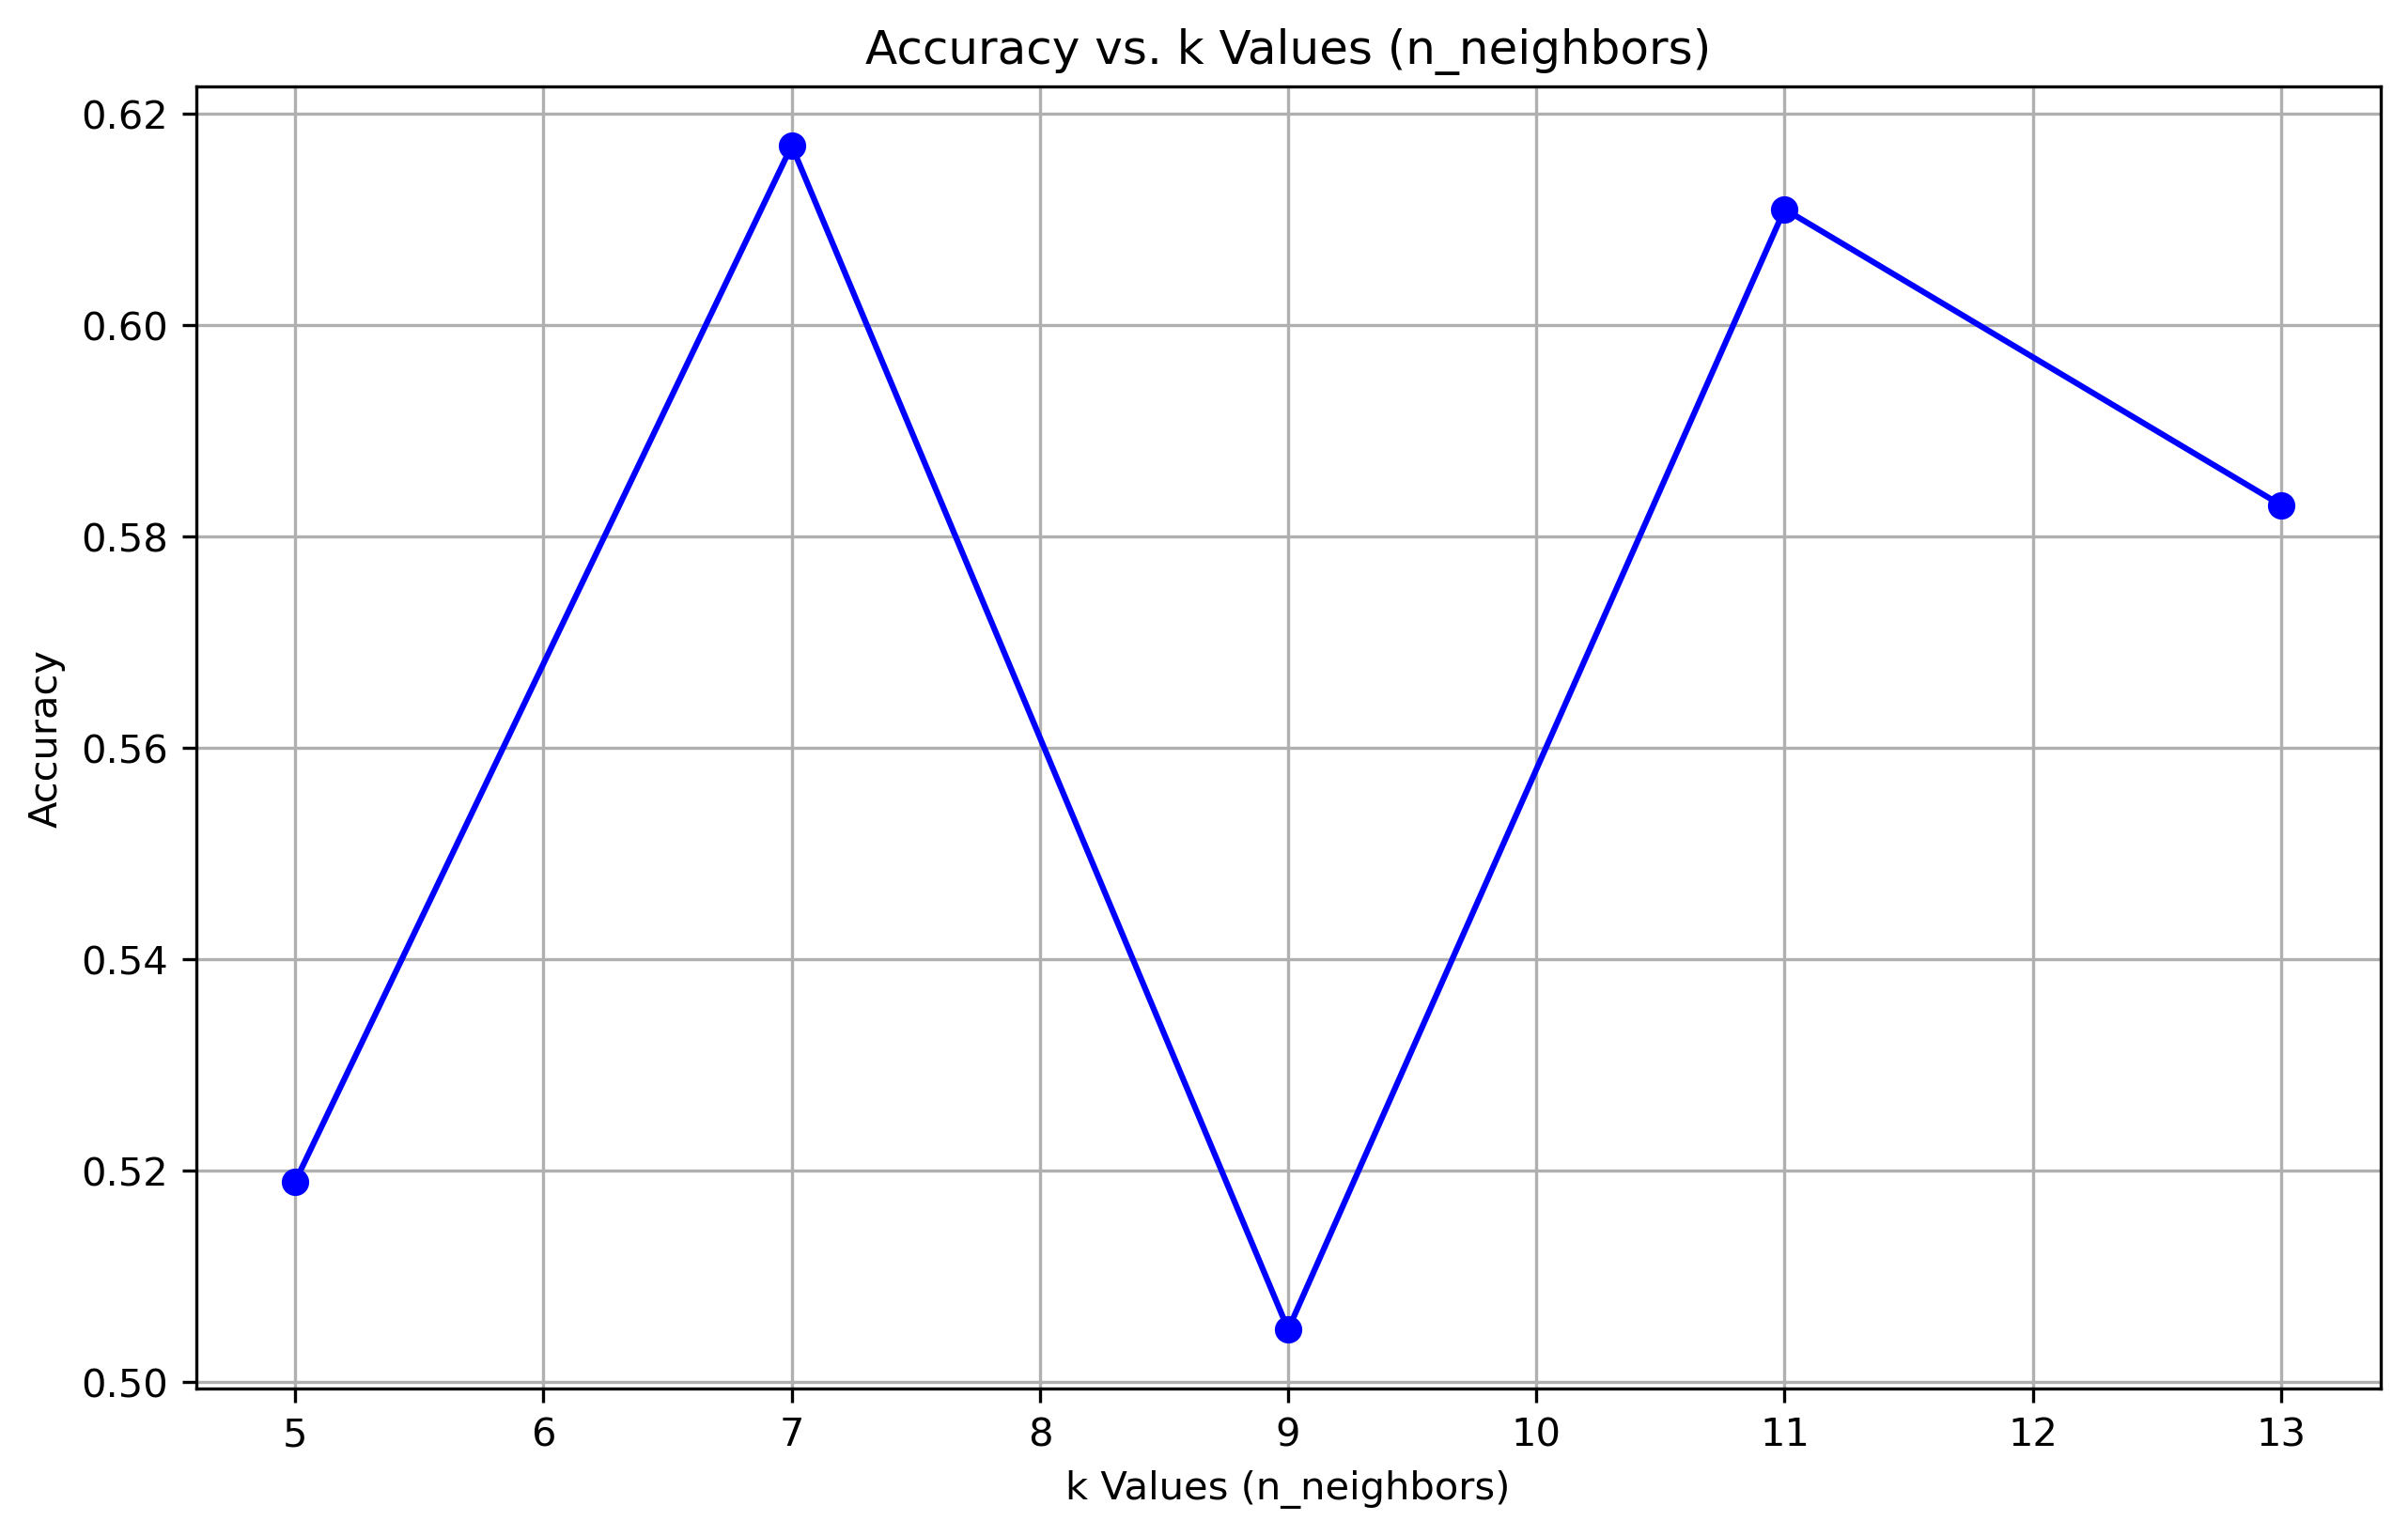

In [38]:
plt.figure(figsize=(10, 6),dpi=300)
plt.plot(knn_chart_df['n_neighbors'], knn_chart_df['Accuracy'], marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. k Values (n_neighbors)')
plt.xlabel('k Values (n_neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)

##### The accuracy value of KNNClassifier(0.617) is greater than Decision Tree(0.489). Hence,KNN  is chosen.

### Task 2.2. Study the impact of at least one key parameter of the model. Describe your findings. Choose the best value(s) for the parameter(s) and justify your choice.
## Answer:
#### Based on the results provided, it appears that the key parameter under consideration is "n_neighbors" in the k-nearest neighbors (KNN) algorithm.The best value for "n_neighbors" seems to vary across the different train/test splits. To determine the overall best value, with the highest accuracy, which is in the 0.2 train/test split with "n_neighbors" set to 7, resulting in an accuracy of 0.617.In the 0.2 train/test split, "n_neighbors" = 7 achieved the highest accuracy, indicating that using 7 nearest neighbors for classification in this specific split resulted in the best performance.

### Task 2.3 With the above optimal parameter(s), train and test the model on different training/test data splits: 20:80, 30:70, 40:60, 50:50, 60:40, 70:30, 80:20. What is the best train/test split? Why?

## Answer:

#### The best train/test split will be the one that results in the highest accuracy value, indicating the best model fit to the data is 80% training data and 20% test data

# Task 3: Clustering

## Task 3.1

## K Means Clustering

+-----+--------------------+
|   K |   Silhouette Score |
+=====+====================+
|   2 |              0.218 |
+-----+--------------------+
|   3 |              0.161 |
+-----+--------------------+
|   4 |              0.168 |
+-----+--------------------+
|   5 |              0.138 |
+-----+--------------------+
|   6 |              0.122 |
+-----+--------------------+
|   7 |              0.13  |
+-----+--------------------+
|   8 |              0.119 |
+-----+--------------------+
|   9 |              0.121 |
+-----+--------------------+
|  10 |              0.117 |
+-----+--------------------+


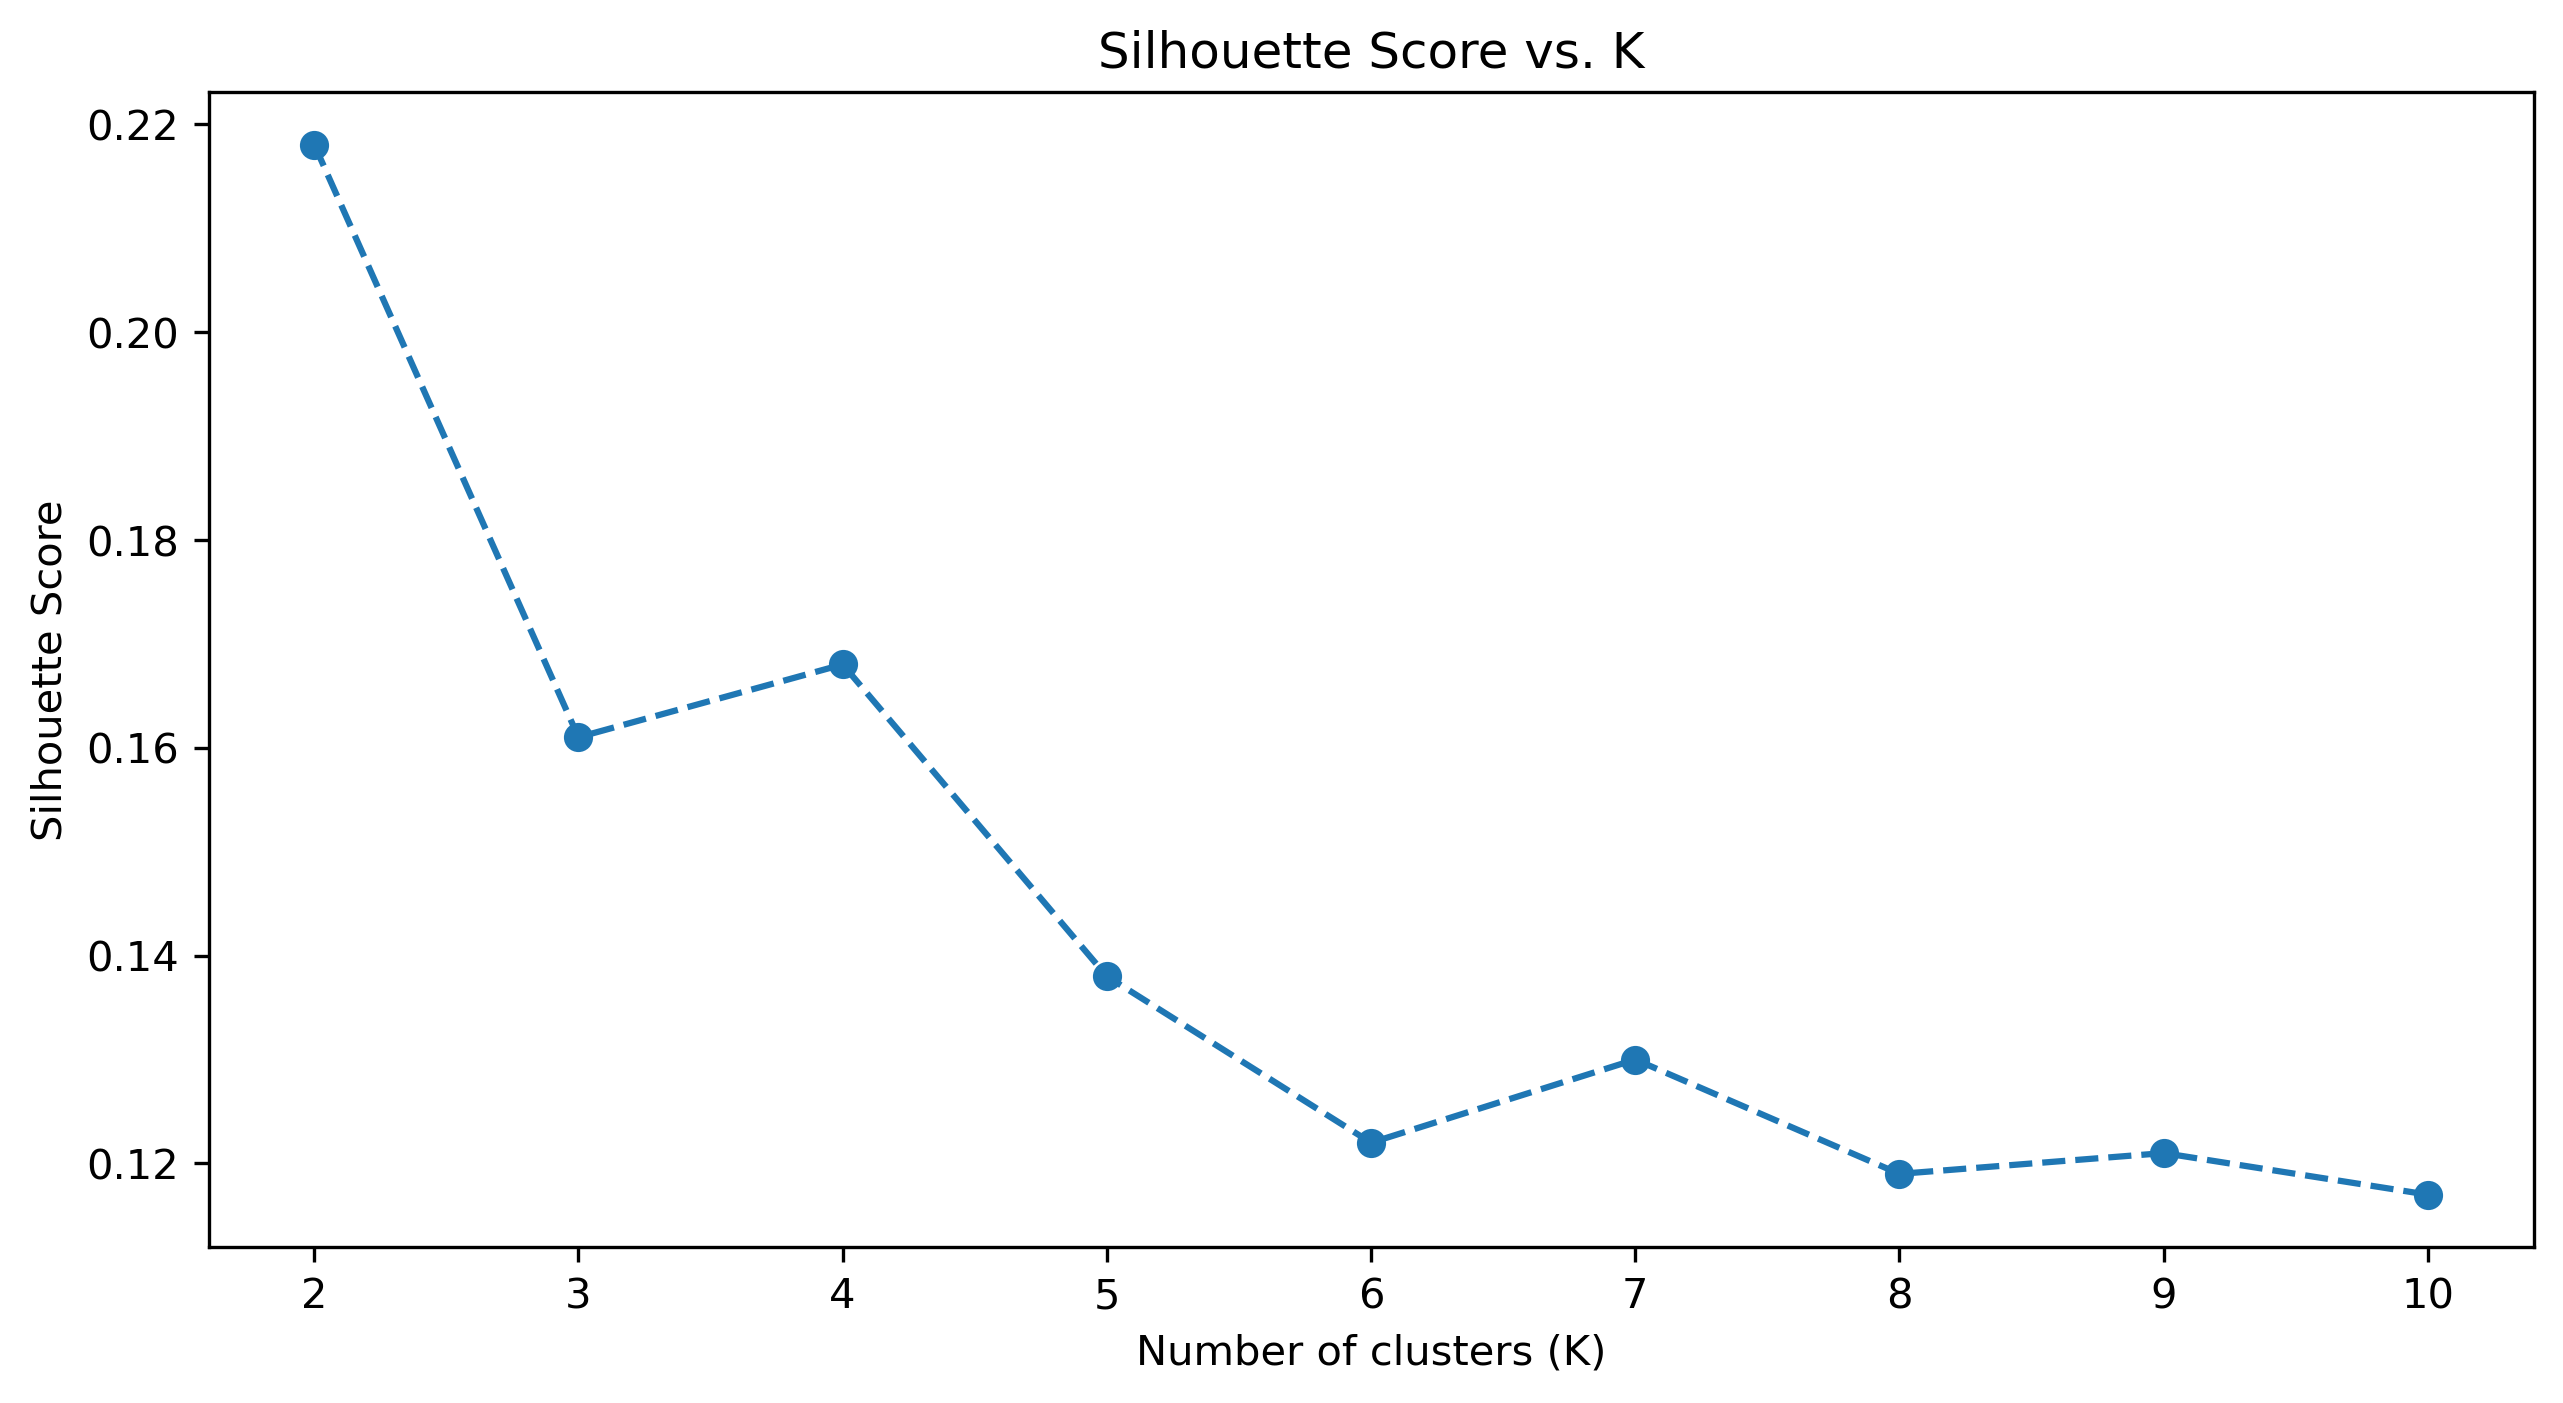

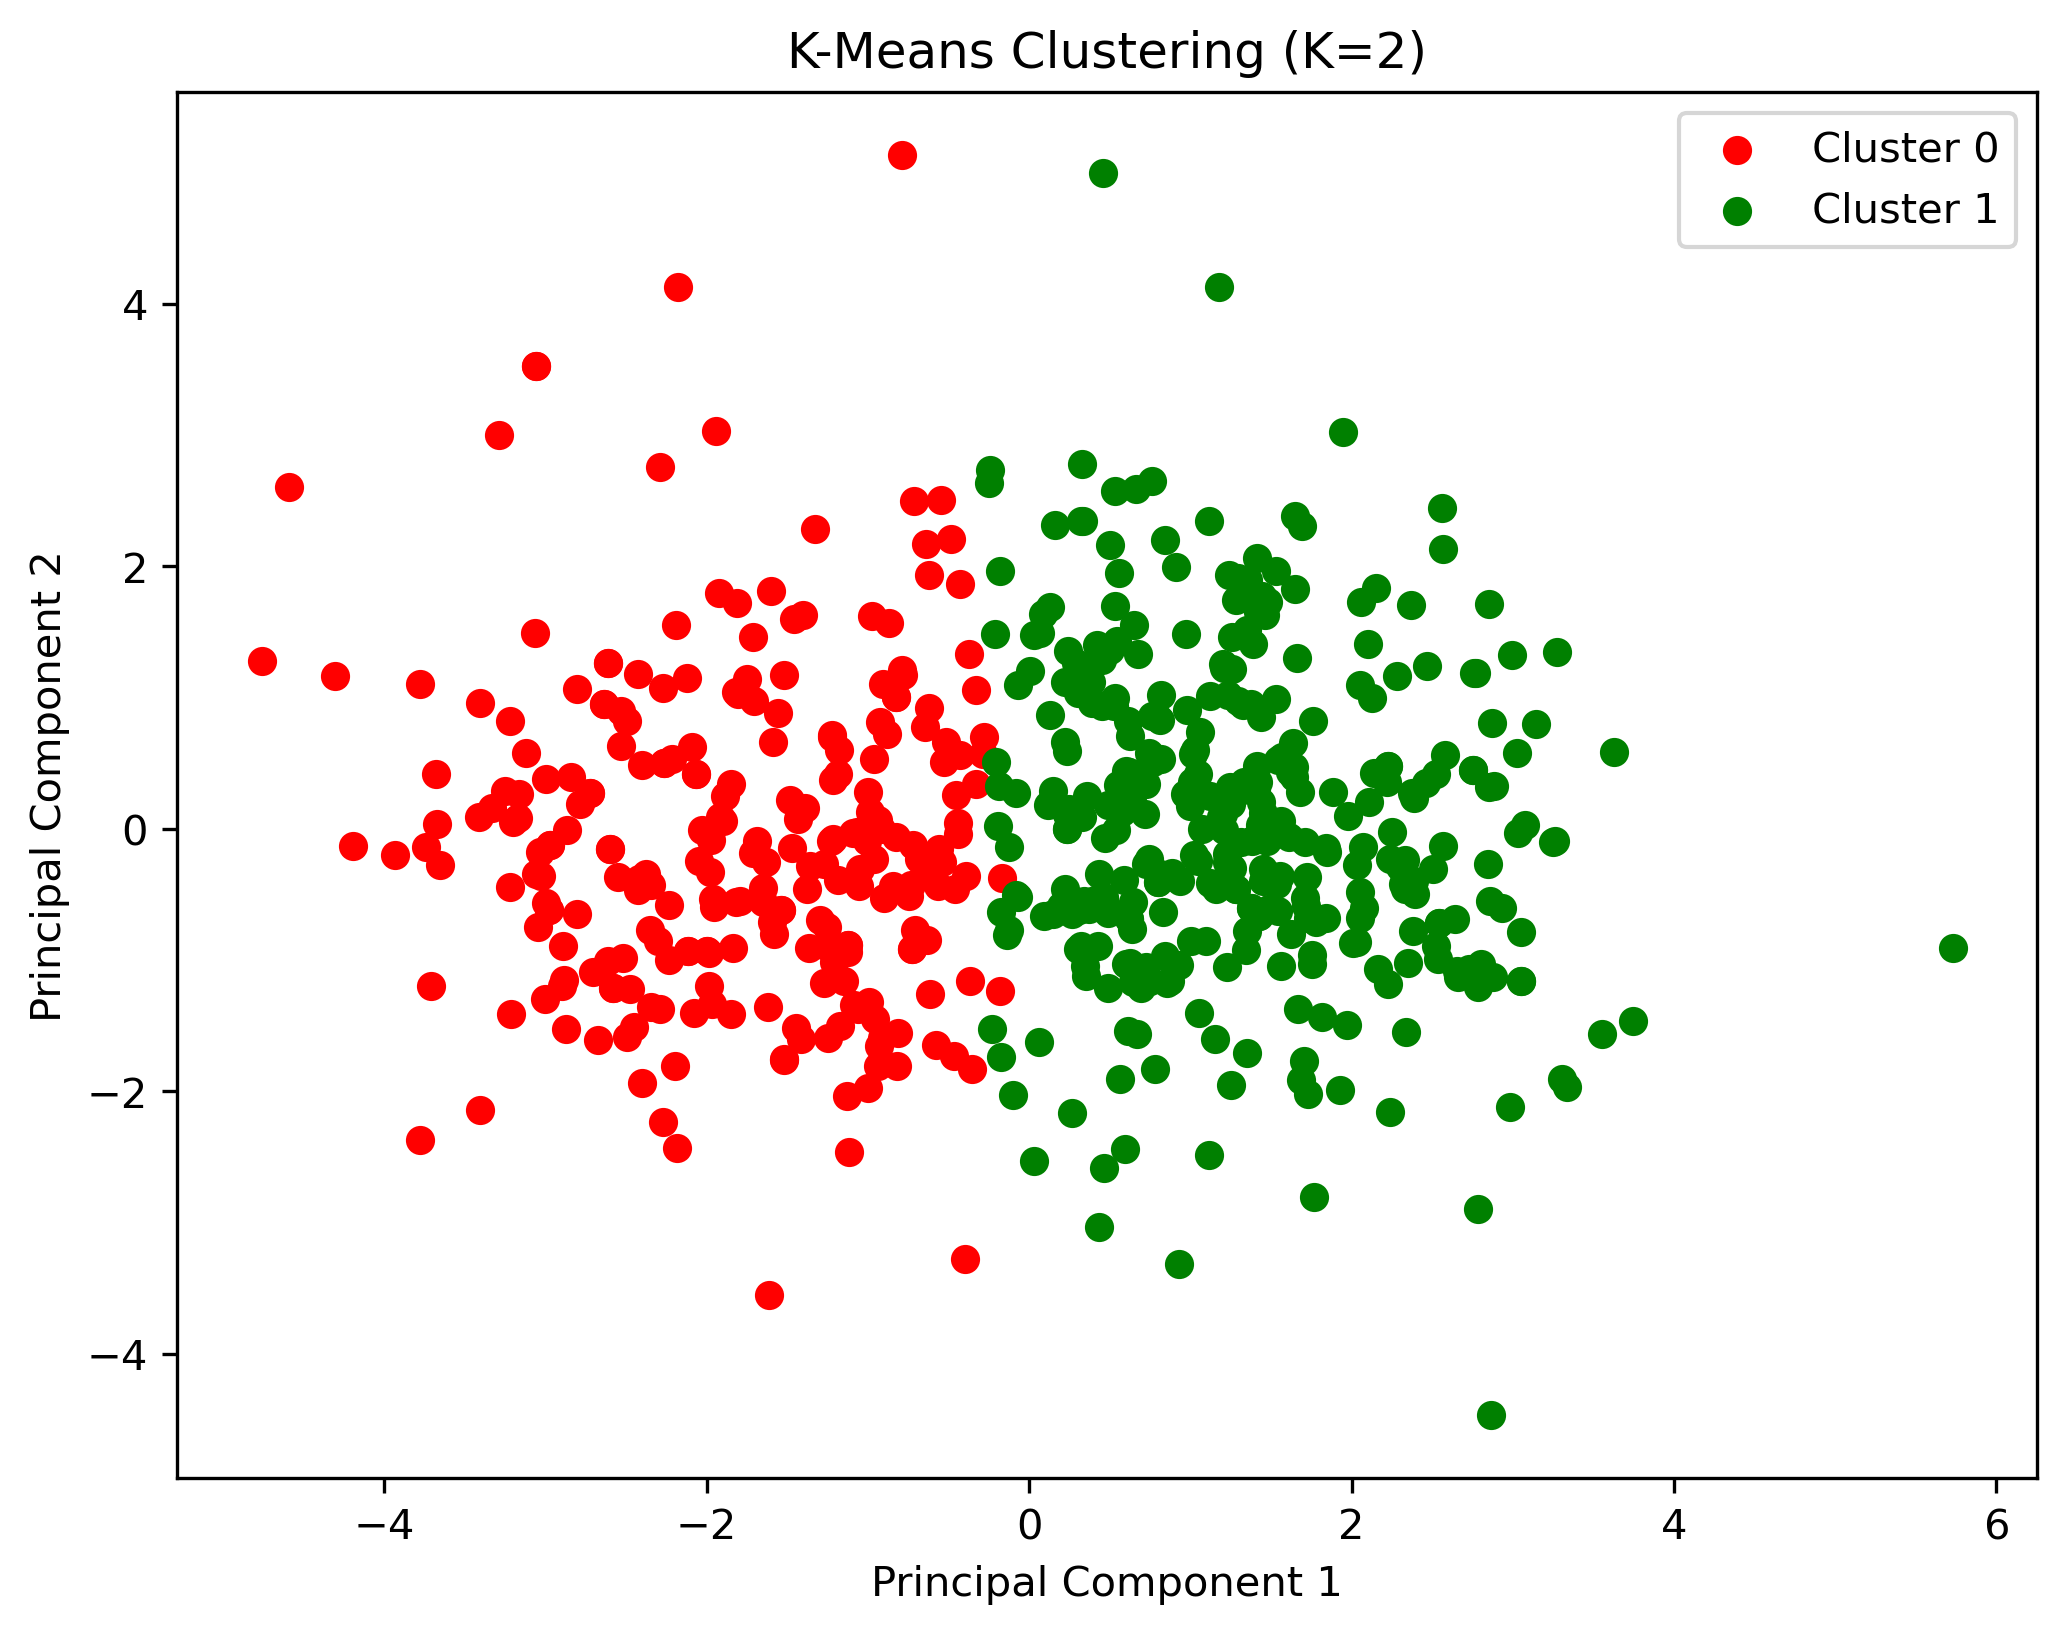

In [39]:
X = std_data.drop('quality', axis=1)  
# Find the optimal number of clusters (K) using Silhouette Score
results = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    silhouette = round(silhouette_score(X, kmeans.labels_), 3)
    results.append([k, silhouette])

# Convert the results to a table using tabulate
table = tabulate(results, headers=['K', 'Silhouette Score'], tablefmt='grid')
print(table)
optimal_k = results.index(max(results, key=lambda x: x[1])) + 2  # Choose K with the highest Silhouette Score

# Plot a graph for K values and Silhouette Scores
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(range(2, 11), [r[1] for r in results], marker='o', linestyle='--')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. K')

# Train the K-Means model with the chosen K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters
plt.figure(figsize=(8, 6), dpi=300)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'w']
for i in range(optimal_k):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}', c=colors[i])

# No need to plot the cluster centers (remove centroids)
plt.title(f'K-Means Clustering (K={optimal_k})')
plt.xlabel('Principal Component 1')  
plt.ylabel('Principal Component 2')  
plt.legend()


## DBSCAN

Best Combinations for Each eps:
+-------+---------------+--------------------+
|   Eps |   Min Samples |   Silhouette Score |
+=======+===============+====================+
|   1.9 |             5 |           0.168109 |
+-------+---------------+--------------------+
Best Overall Combination:
+--------------------+-------------------+------------------------+
| Best eps:          | Best min_samples: | Best silhouette score: |
+--------------------+-------------------+------------------------+
| 1.9000000000000001 | 5                 | 0.168108584556412      |
+--------------------+-------------------+------------------------+
Number of clusters: 1


Text(0.5, 1.0, 'DBSCAN Clustering with PCA')

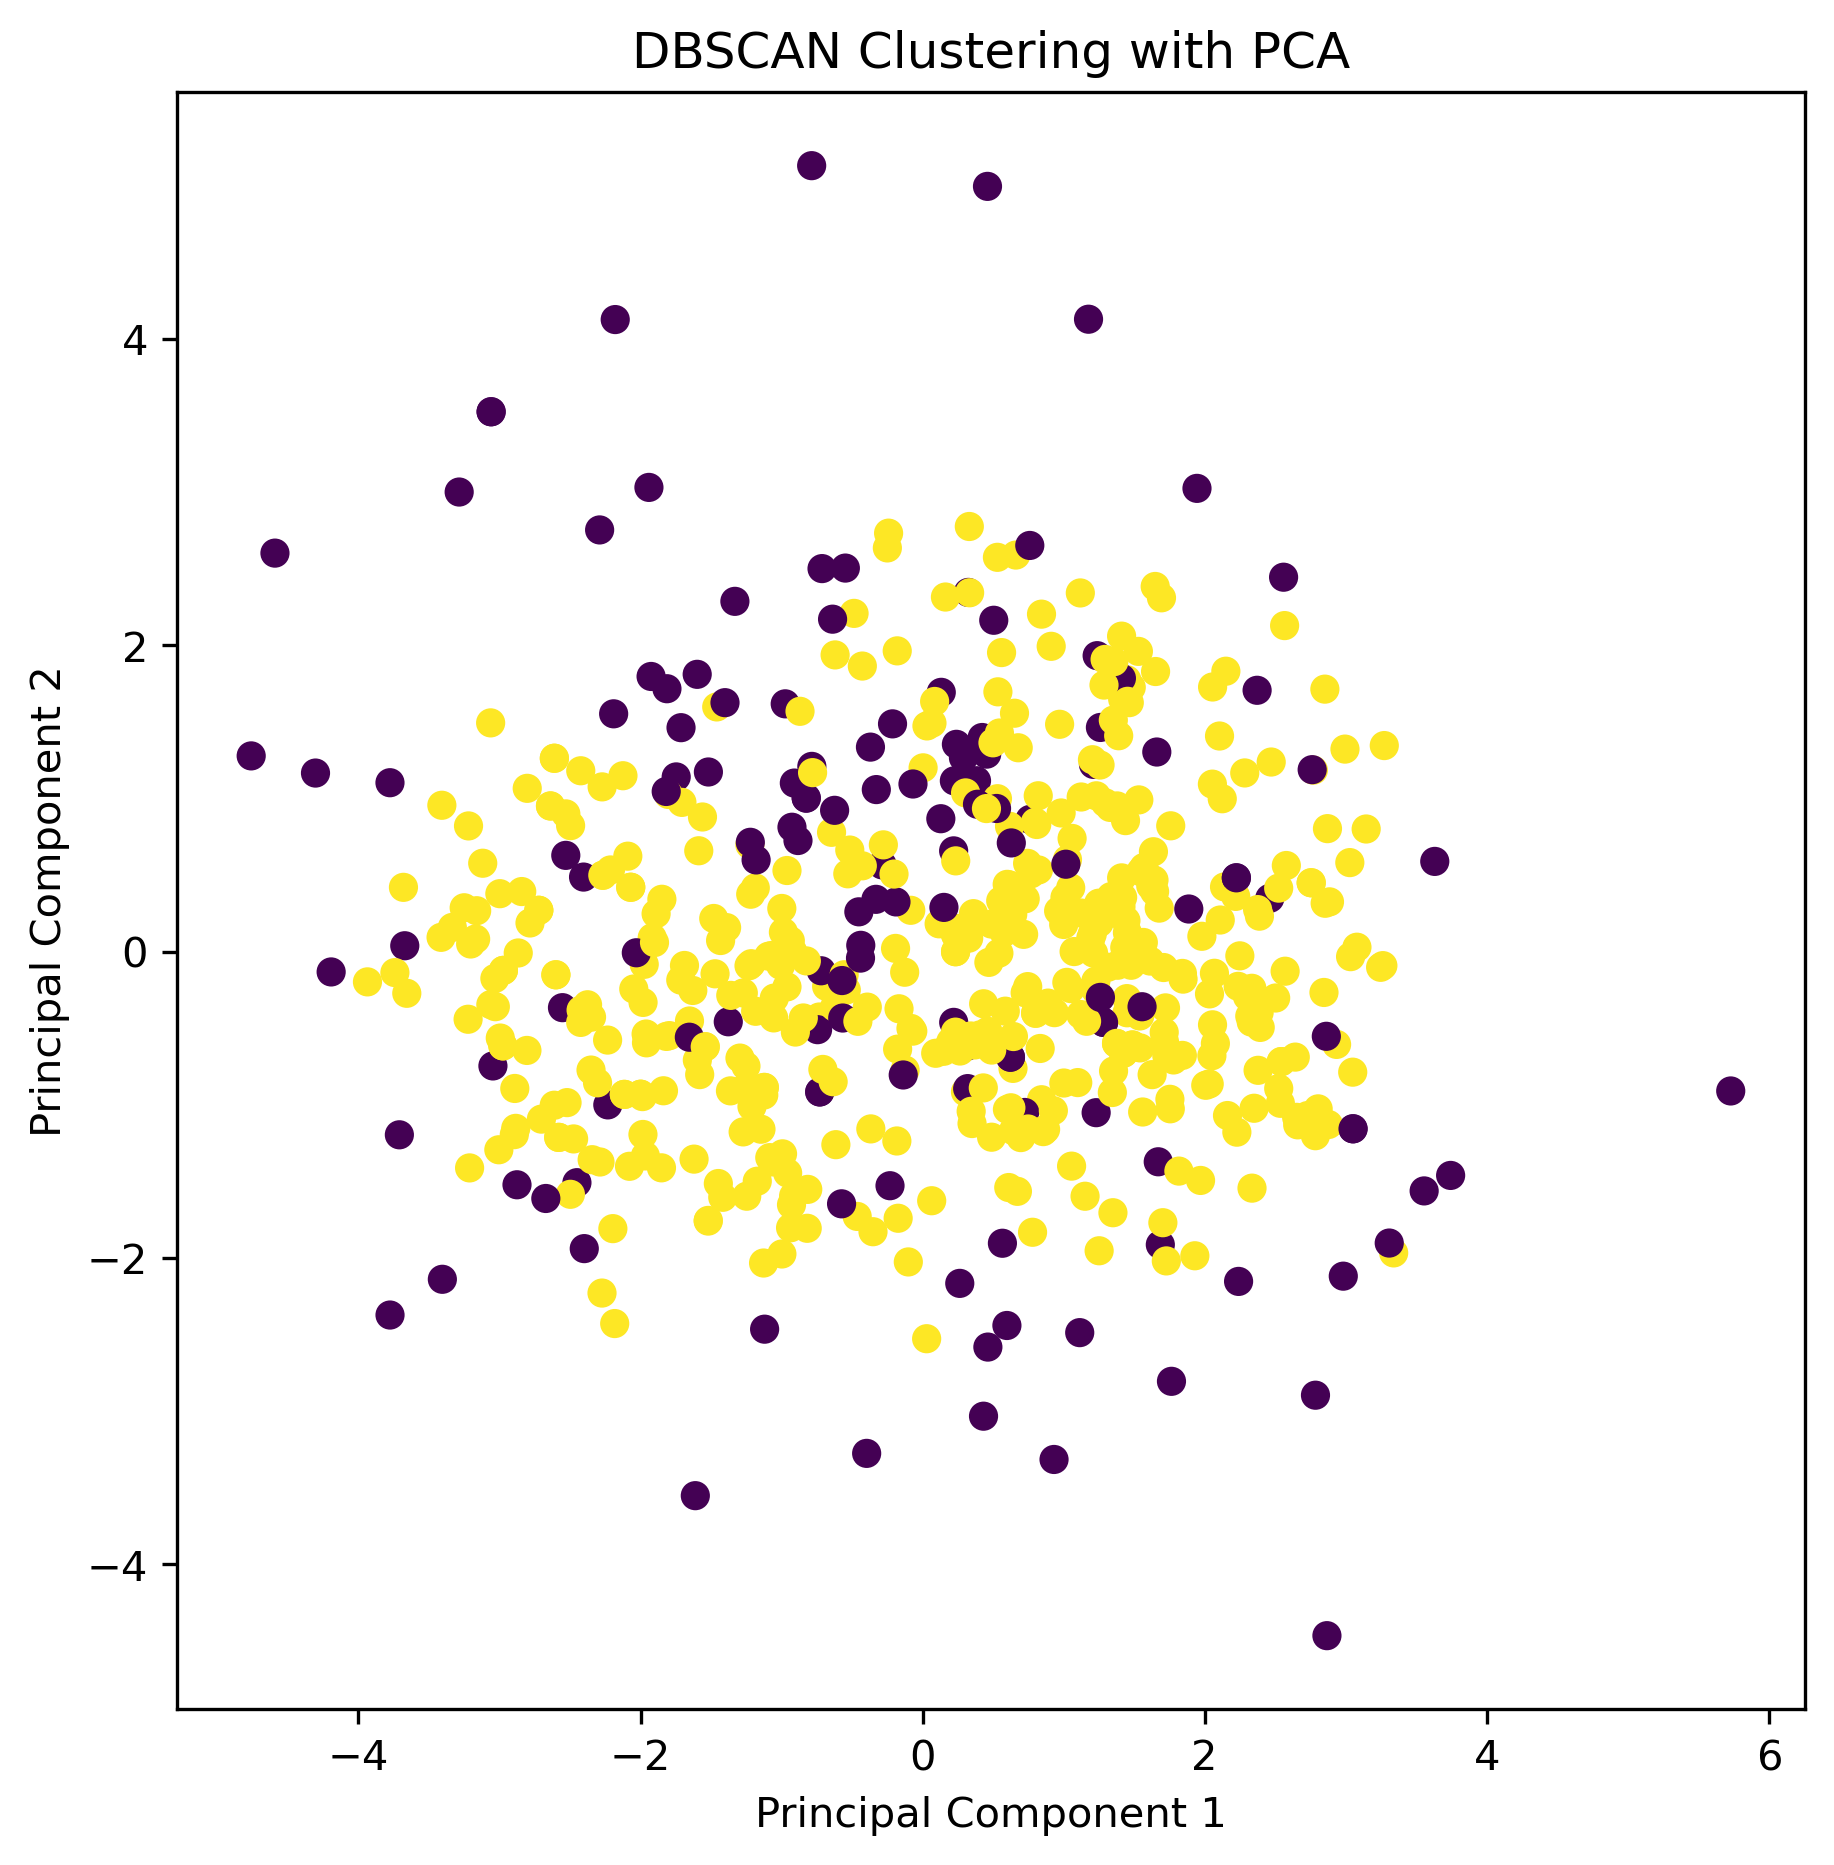

In [40]:
# Optimal hyperparameter tuning
best_eps = 0
best_min_samples = 0
best_silhouette_score = -1
combinations = []

for eps in np.arange(0.1, 2.0, 0.1):
    for min_samples in range(5, 20):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        if len(np.unique(labels)) > 1:  # Ensure more than one cluster is formed
            silhouette_avg = silhouette_score(X, labels)
            combinations.append([eps, min_samples, silhouette_avg])
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

# Filter combinations to keep only the best combination for each eps
filtered_combinations = [combo for combo in combinations if combo[2] == best_silhouette_score]

# Convert the combinations to a table using tabulate
table = tabulate(filtered_combinations, headers=['Eps', 'Min Samples', 'Silhouette Score'], tablefmt='grid')

print("Best Combinations for Each eps:")
print(table)

# Print the best overall combination
print("Best Overall Combination:")
best_combination = [best_eps, best_min_samples, best_silhouette_score]
print(tabulate([["Best eps:", "Best min_samples:", "Best silhouette score:"], best_combination], tablefmt='grid'))

# Apply DBSCAN with the best hyperparameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan.fit_predict(X)

# Print the number of clusters
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # -1 represents noise points
print(f"Number of clusters: {n_clusters}")

# Visualization using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Visualize DBSCAN clusters using PCA
plt.figure(figsize=(7, 7), dpi=300)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2') 
plt.title("DBSCAN Clustering with PCA")


## Task 3.2

#### Determine the optimal number of clusters, and justify.

#### Answer:
#### For KMeans Clustering,Based on the Silhouette Score, K=2 is the optimal number of clusters as it has the highest score.
#### For DBSCAN,Based on the Silhouette Score, the optimal combination of hyperparameters for DBSCAN is achieved when Eps=1.8 and Min Samples=5, resulting in a higher Silhouette Score, indicating better cluster separation. This combination is the best choice for clustering, as it maximizes data point cohesion within clusters and separation between clusters.

## Task 3.3

Text(0.5, 1.0, 'Confusion Matrix of KMeans')

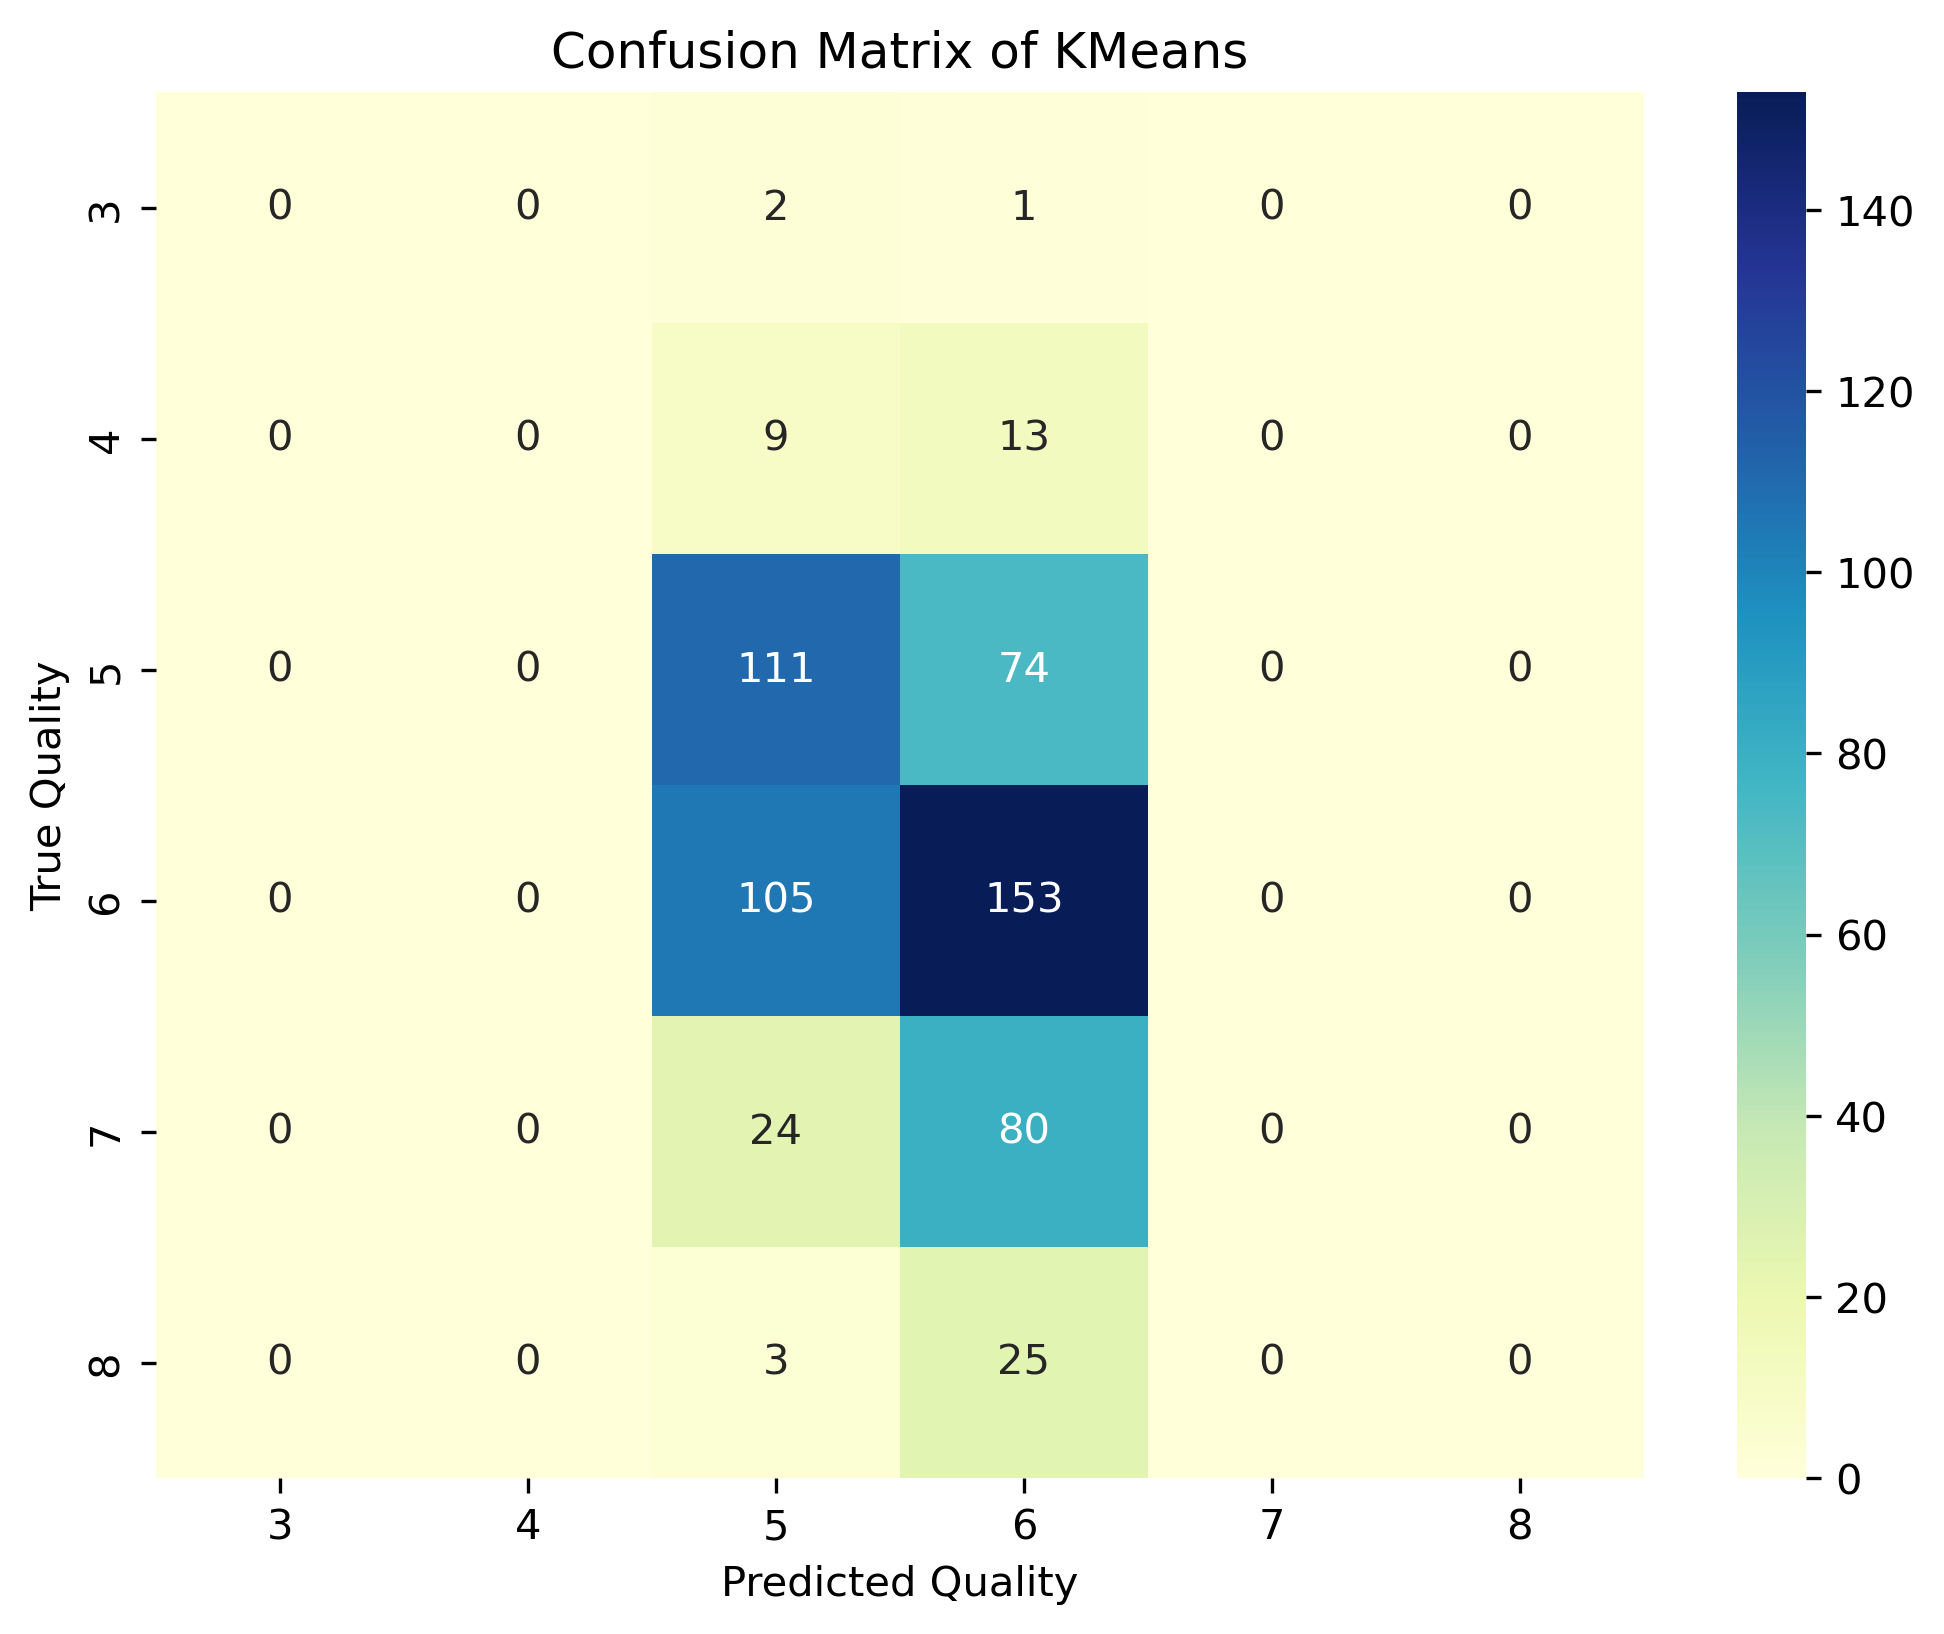

In [41]:
cluster_quality_mapping = {}
for i in range(optimal_k):
    cluster_indices = np.where(kmeans.labels_ == i)
    cluster_quality_values = std_data.iloc[cluster_indices]['quality'].values
    unique_quality_values, counts = np.unique(cluster_quality_values, return_counts=True)
    most_common_quality = unique_quality_values[np.argmax(counts)]
    cluster_quality_mapping[i] = most_common_quality
# Map cluster assignments to quality levels for all data points
predicted_quality = [cluster_quality_mapping[label] for label in kmeans.labels_]
confusion_mat = confusion_matrix(std_data['quality'], predicted_quality, labels=[3, 4, 5, 6, 7, 8])
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="YlGnBu", xticklabels=[3, 4, 5, 6, 7, 8], yticklabels=[3, 4, 5, 6, 7, 8])
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.title('Confusion Matrix of KMeans')


 #### In this case,
 #### Misclassifications: The confusion matrix indicates that there were several misclassifications, where data points from one quality level were assigned to another quality level by the K-Means clustering algorithm.

#### Difficulty in Discrimination: It's apparent that some quality levels, such as 3 and 4, or 5 and 6, were frequently confused with each other, as shown by the higher counts in off-diagonal cells, indicating the model's difficulty in discriminating between these quality levels.

## Confusion Matrix of DBSCAN

Text(0.5, 1.0, 'Confusion Matrix for DBSCAN Clustering')

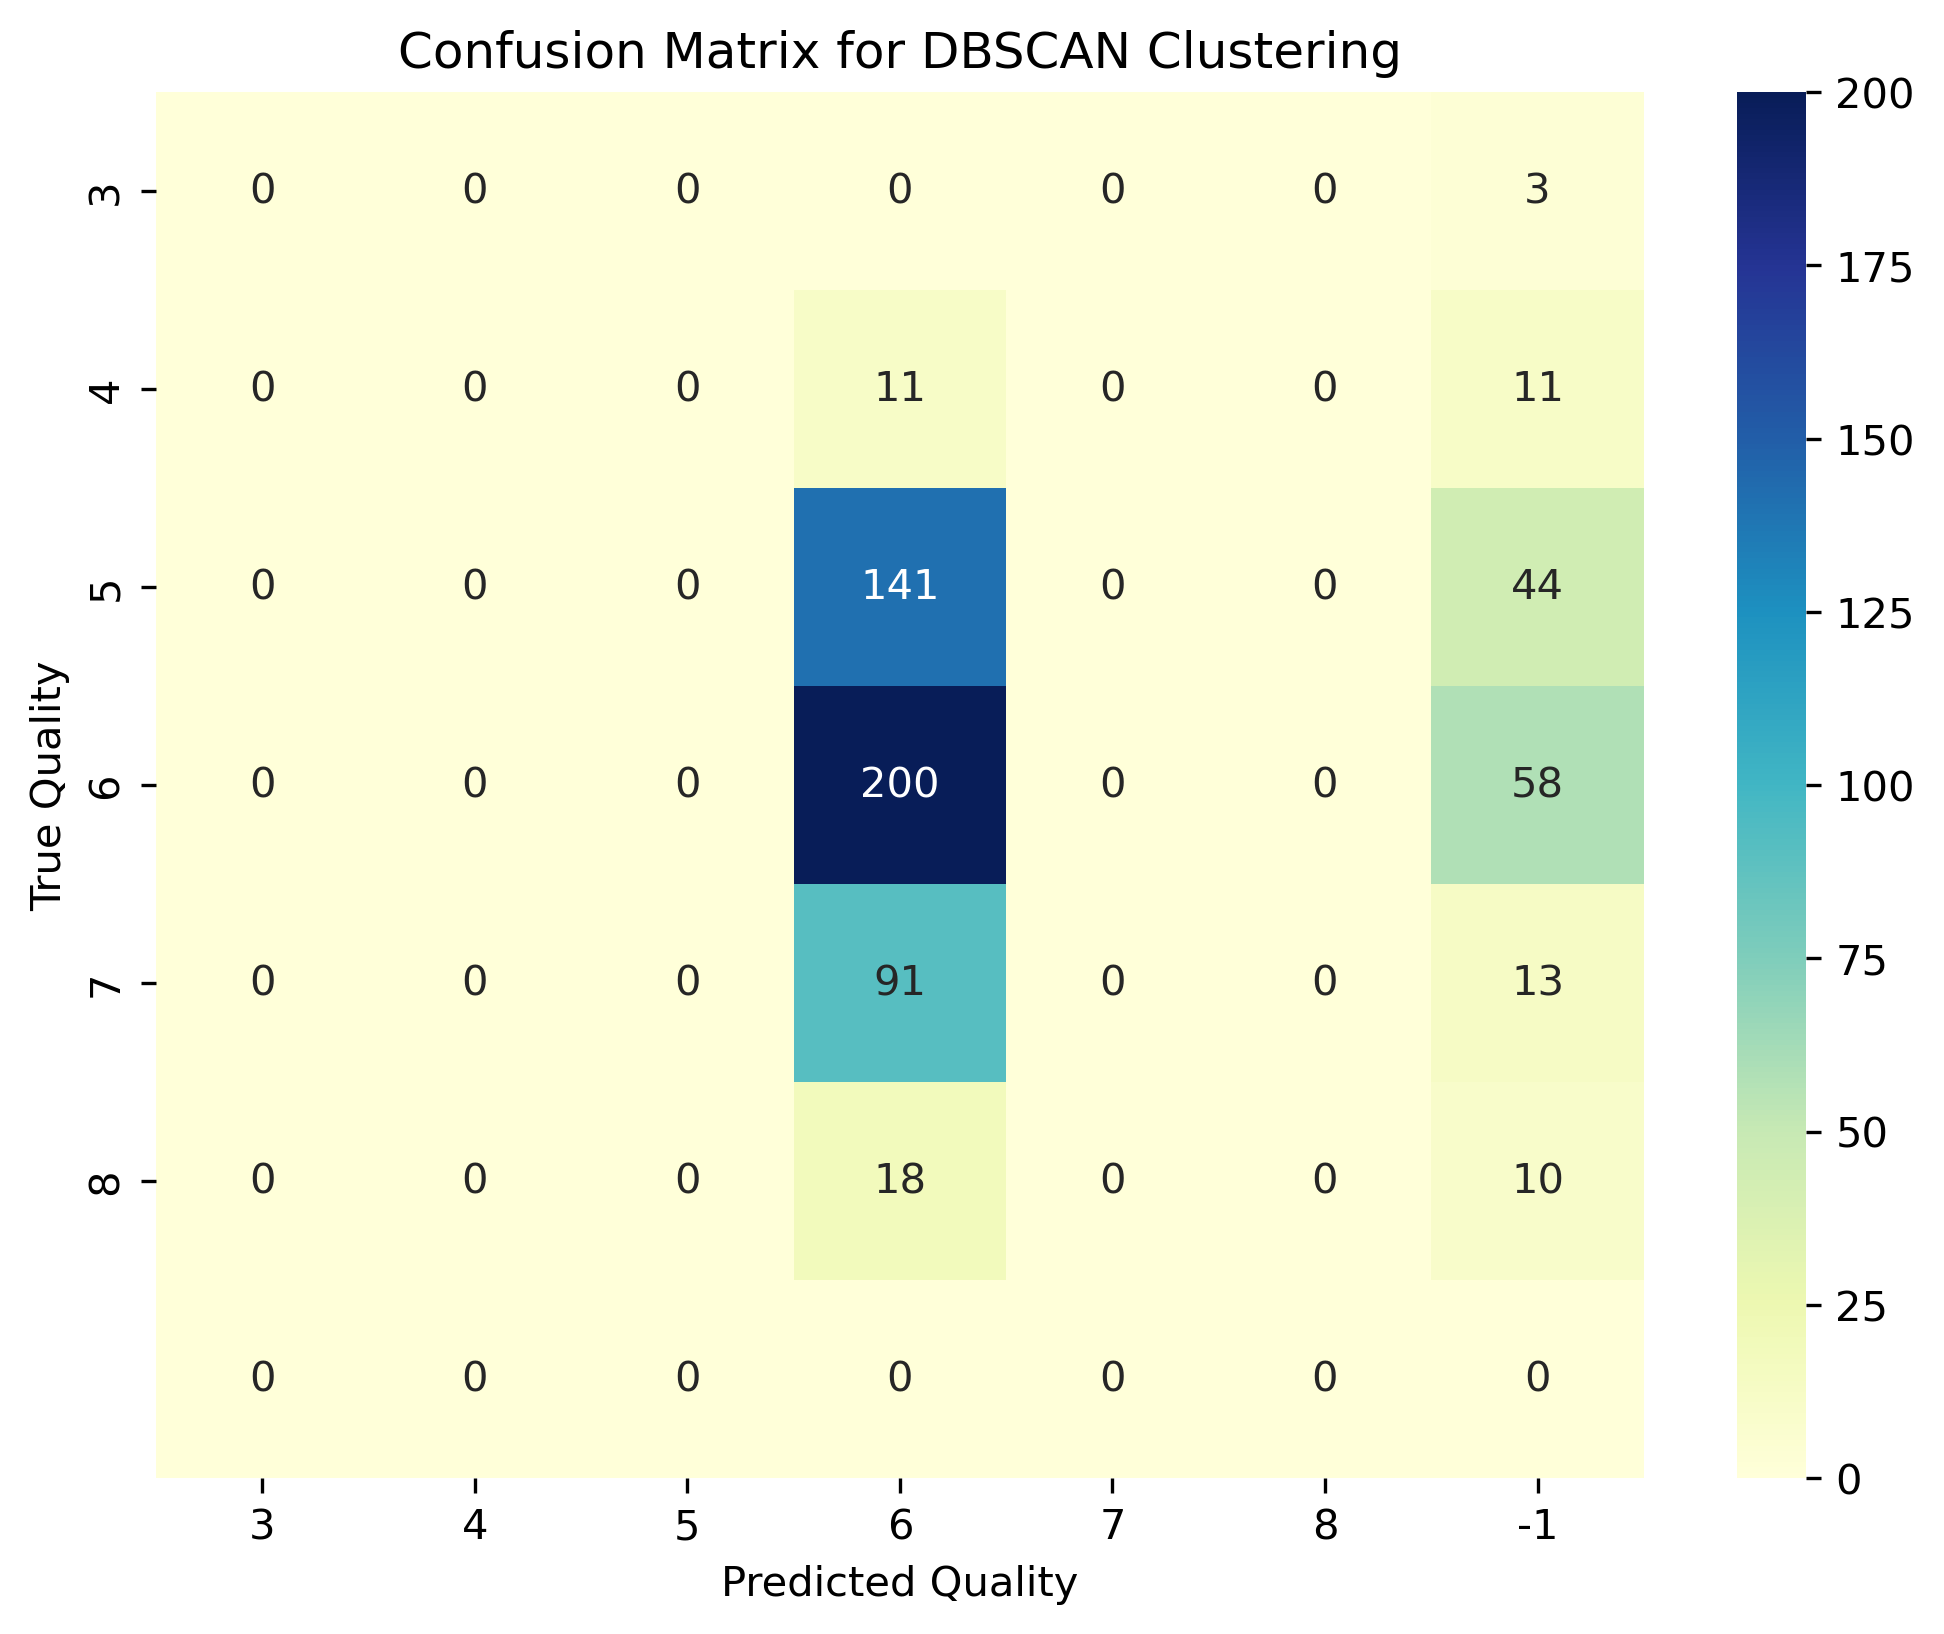

In [42]:
# Apply DBSCAN with the best hyperparameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = dbscan.fit_predict(X)
cluster_quality_mapping = {}
for cluster_id in np.unique(labels):
    if cluster_id != -1:  # Exclude noise points
        cluster_indices = np.where(labels == cluster_id)
        cluster_quality_values = std_data.iloc[cluster_indices]['quality'].values
        unique_quality_values, counts = np.unique(cluster_quality_values, return_counts=True)
        most_common_quality = unique_quality_values[np.argmax(counts)]
        cluster_quality_mapping[cluster_id] = most_common_quality
predicted_quality = [cluster_quality_mapping[label] if label != -1 else -1 for label in labels]
confusion_mat = confusion_matrix(std_data['quality'], predicted_quality, labels=[3, 4, 5, 6, 7, 8, -1])  # Include -1 for noise points

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="YlGnBu", xticklabels=[3, 4, 5, 6, 7, 8, -1], yticklabels=[3, 4, 5, 6, 7, 8])
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.title('Confusion Matrix for DBSCAN Clustering')

#### Here's what the confusion matrix shows:

#### The diagonal elements (from top-left to bottom-right) represent the correctly classified samples for each quality level. For example, on the diagonal element at [3,3], there are 3 samples from the true quality level 3 that were correctly classified as 3.The off-diagonal elements represent the misclassified samples. For example, in the row for true quality 3, there are 3 samples that were misclassified as quality 7. In the row for true quality 4, 11 samples were misclassified as quality 6, and 11 samples were correctly classified as quality 4.The last column (with quality -1) represents the noise points. In the last row, there are 0 true quality points that were misclassified as noise, and 0 true noise points that were correctly identified as noise.